## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 


### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 



In [0]:
import math
import numpy as np
import sympy
from tabulate import tabulate
import matplotlib.pyplot as plt
import requests
import json


def func_to_table(min, max, num_of_point, func, name_func, display_table):
    table = []
    x_array = []
    y_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max + step, step):
        table.append([name_func, i, func(i)])
        x_array.append(i)
        y_array.append(func(i))

    if display_table:
        print(tabulate(table, headers=['L.P.', 'x', 'f(x)'], tablefmt="fancy_grid", floatfmt=".10f"))

    return x_array, y_array


def square_polynomial_approximation(x_array, y_array, M):
    N = len(x_array)
    G_tab = [0] * (2 * M + 1)

    for i in range(2 * M + 1):
        sum = 0
        for j in range(N):
            sum += pow(x_array[j], i)
        G_tab[i] = sum

    B_tab = np.zeros(M + 1)

    for i in range(M + 1):
        sum = 0
        for j in range(N):
            sum += (pow(x_array[j], i) * y_array[j])
        B_tab[i] = sum

    G_matrix = np.zeros((M + 1, M + 1))

    for i in range(M + 1):
        for j in range(M + 1):
            G_matrix[i][j] = G_tab[i + j]

    A_tab = np.linalg.solve(G_matrix, B_tab)

    polynomial = 0
    X = sympy.symbols('x')
    for i in range(M + 1):
        polynomial += pow(X, i) * A_tab[i]

    return sympy.simplify(polynomial)


def calculate_value(polynomial, x):
    X = sympy.symbols('x')
    return polynomial.evalf(subs={X: x})


def compare_charts(min, max, num_of_point, func1, func2, func_name):
    x_array = []
    func1_array = []
    func2_array = []

    step = (max - min) / num_of_point
    for i in np.arange(min, max + step, step):
        x_array.append(i)
        func1_array.append(func1(i))
        func2_array.append(func2(i))
    
    params = {'figure.figsize': (10, 8)}
    plt.rcParams.update(params)
    plt.plot(x_array, func1_array, label="Approximation " + func_name)
    plt.plot(x_array, func2_array, 'or', label=func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(func_name)
    plt.legend()
    plt.show()


def compare_results(min, max, num_of_point, func1, func2, name_func, error_array, display_table):
    table = []
    step = (max - min) / num_of_point
    for i in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([i, func1(i), func2(i), (abs(func2(i) - func1(i))) / abs(func2(i))])
        error_array.append((abs(func2(i) - func1(i))) / abs(func2(i)))
    if display_table:
        print(tabulate(table, headers=['x', name_func, 'Approximation ' + name_func, 'relative error [%]'],
                       tablefmt="fancy_grid", floatfmt=".10f"))


def square_polynomial_approximation_to_M(min, max, number_of_points, display_table, M):
    f = lambda x: pow(x, 3) + 2 * x
    sqrt_x_array, sqrt_y_array = func_to_table(min, max, number_of_points, np.math.sqrt, "sqrt(x)", display_table)
    f_x_array, f_y_array = func_to_table(min, max, number_of_points, f, "x^3 + 2*x", display_table)
    sin_x_array, sin_y_array = func_to_table(min, max, number_of_points, np.math.sin, "sin(x)", display_table)

    for i in range(1, M + 1):
        tmp_sqrt = square_polynomial_approximation(sqrt_x_array, sqrt_y_array, i)
        tmp_f = square_polynomial_approximation(f_x_array, f_y_array, i)
        tmp_sin = square_polynomial_approximation(sin_x_array, sin_y_array, i)

        polynomial_sqrt = lambda x: calculate_value(tmp_sqrt, x)
        polynomial_f = lambda x: calculate_value(tmp_f, x)
        polynomial_sin = lambda x: calculate_value(tmp_sin, x)

        error_array = []
        compare_charts(min, max, 100, polynomial_sqrt, math.sqrt, "sqrt")
        compare_results(min, max, number_of_points, polynomial_sqrt, math.sqrt, "sqrt", error_array, display_table)
        print("Relative error for sqrt and {} degree is {} %".format(i, (np.sum(error_array) / len(error_array))))

        error_array = []
        compare_charts(min, max, 100, polynomial_sin, math.sin, "sin")
        compare_results(min, max, number_of_points, polynomial_sin, math.sin, "sin", error_array, display_table)
        print("Relative error for sin and {} degree is {} %".format(i, (np.sum(error_array) / len(error_array))))

        error_array = []
        compare_charts(min, max, 100, polynomial_f, f, "f")
        compare_results(min, max, number_of_points, polynomial_f, f, "f", error_array, display_table)
        print("Relative error for f = x^3 + 2x and {} degree is {} %".format(i, (np.sum(error_array) / len(error_array))))


#Aproksymacja dla funkcji sin, sqrt oraz f(x) = x^3+2x dla stopni od 1 do 10 , 100 punktów: 

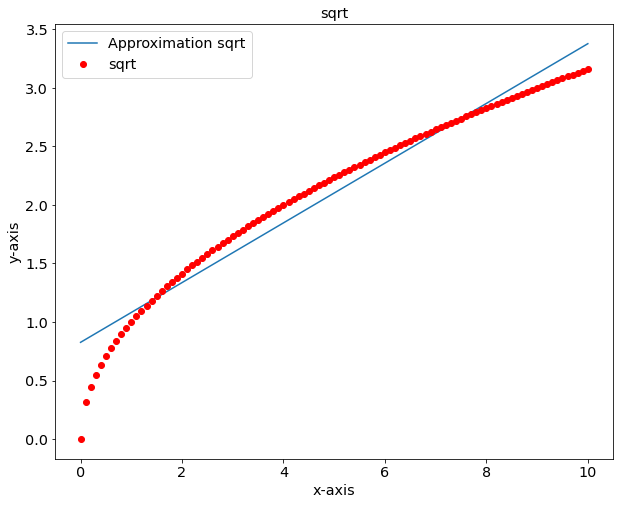

Relative error for sqrt and 1 degree is 0.108245924052918 %


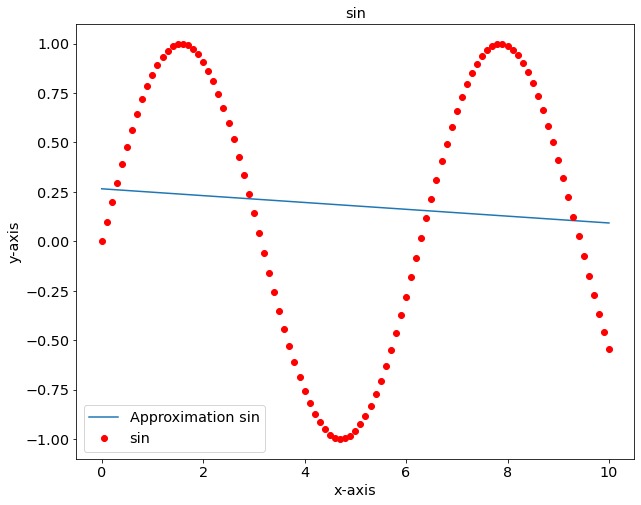

Relative error for sin and 1 degree is 1.32686498767828 %


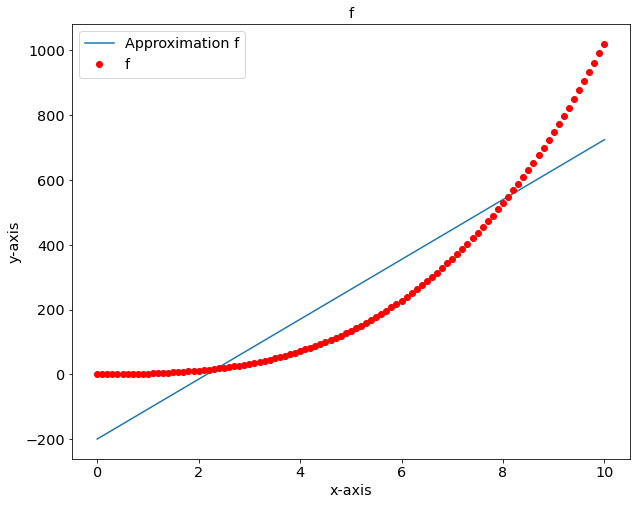

Relative error for f = x^3 + 2x and 1 degree is 38.3464905222696 %


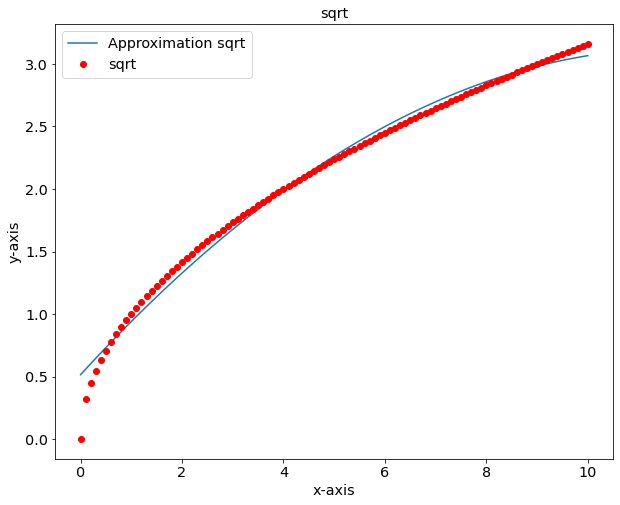

Relative error for sqrt and 2 degree is 0.0464145355661575 %


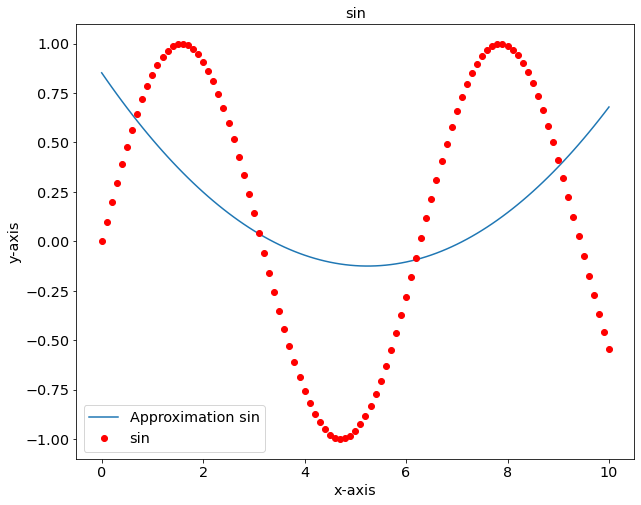

Relative error for sin and 2 degree is 1.40585730647372 %


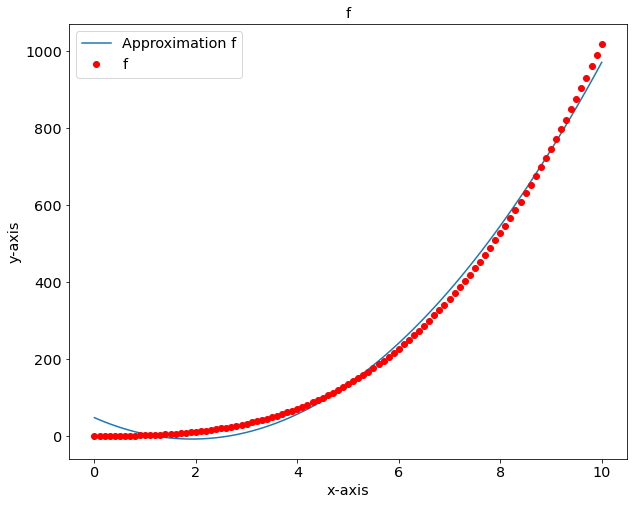

Relative error for f = x^3 + 2x and 2 degree is 7.86287677935439 %


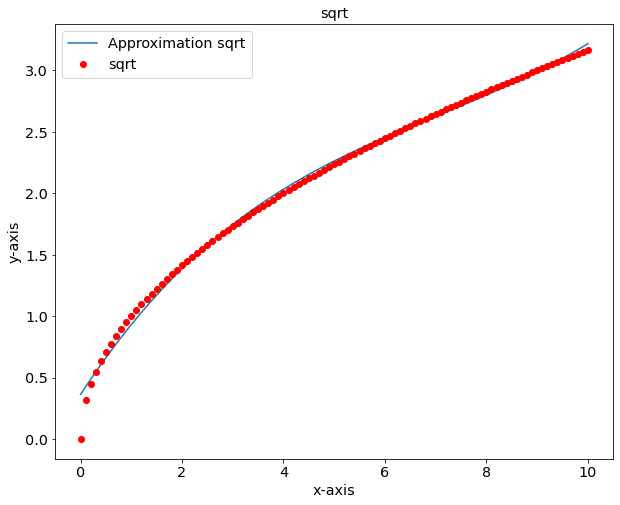

Relative error for sqrt and 3 degree is 0.0256639856058848 %


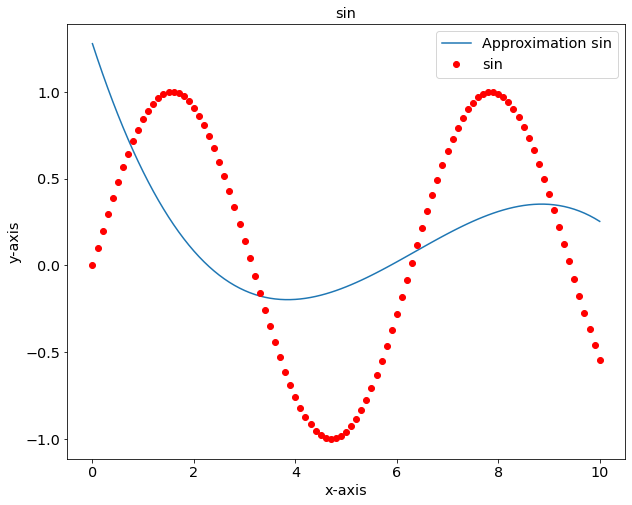

Relative error for sin and 3 degree is 1.50876245837642 %


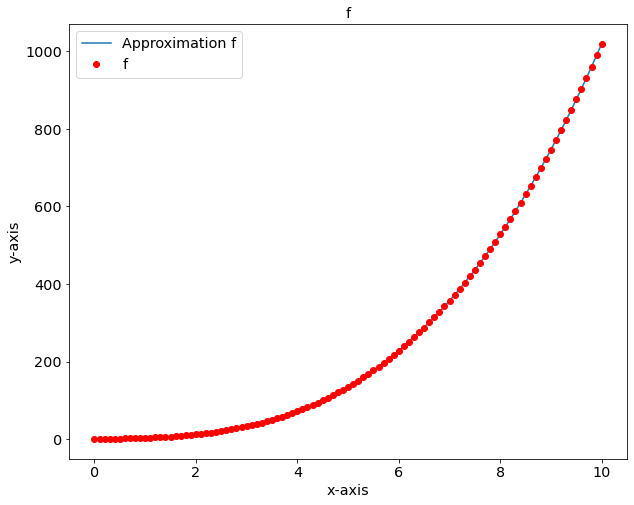

Relative error for f = x^3 + 2x and 3 degree is 1.47078526079980E-12 %


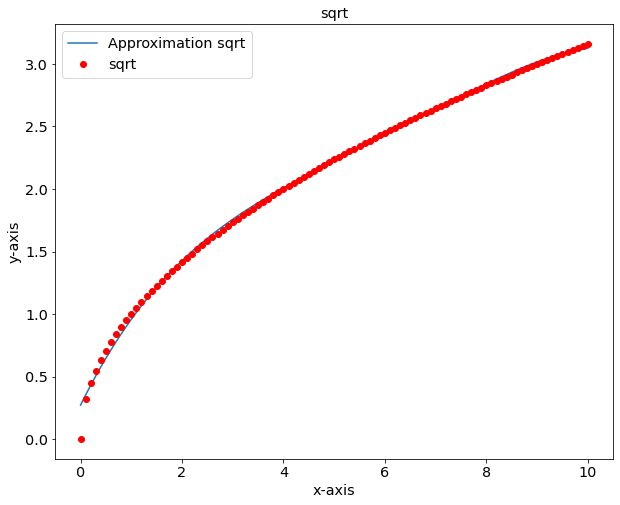

Relative error for sqrt and 4 degree is 0.0163673844935262 %


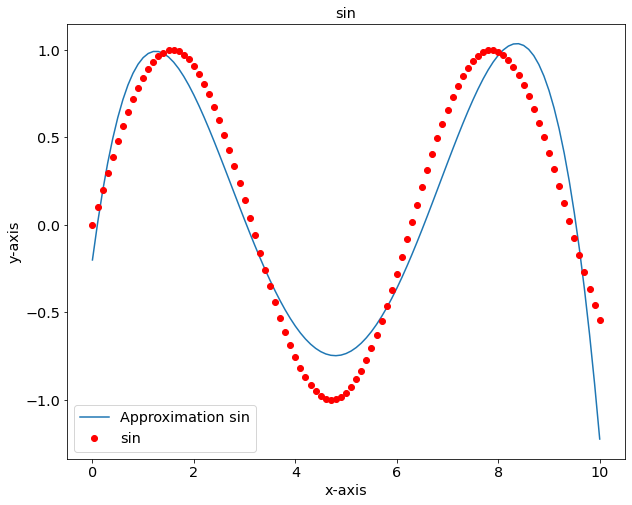

Relative error for sin and 4 degree is 0.626754214163552 %


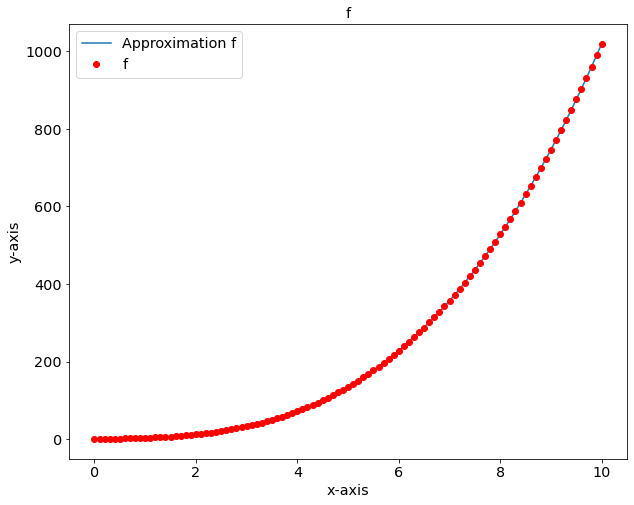

Relative error for f = x^3 + 2x and 4 degree is 6.46961883121054E-14 %


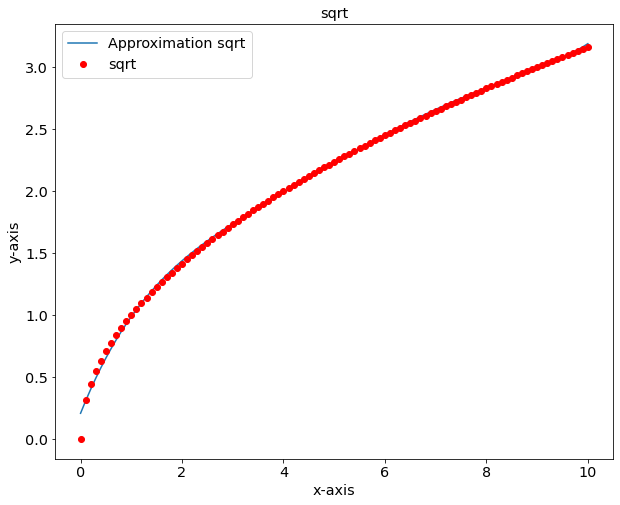

Relative error for sqrt and 5 degree is 0.0120123731805259 %


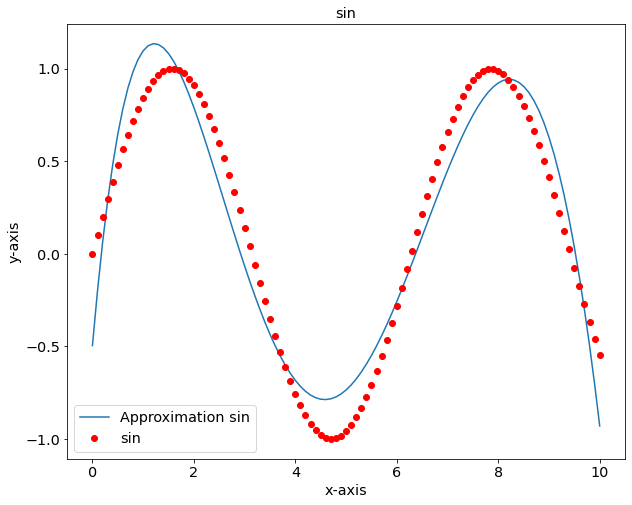

Relative error for sin and 5 degree is 0.695172638673007 %


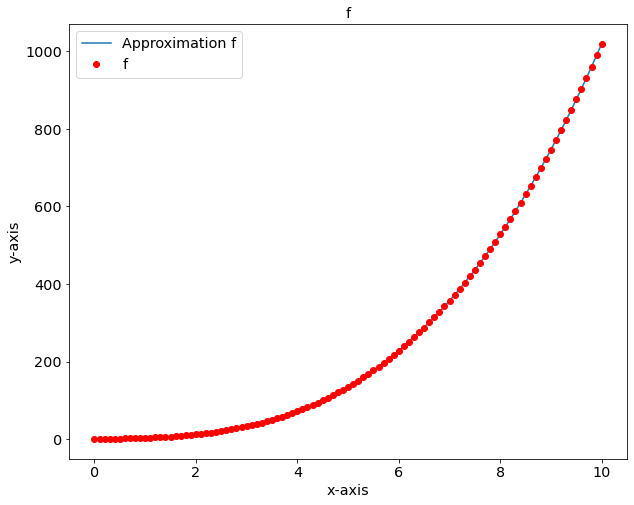

Relative error for f = x^3 + 2x and 5 degree is 2.43923574812093E-11 %


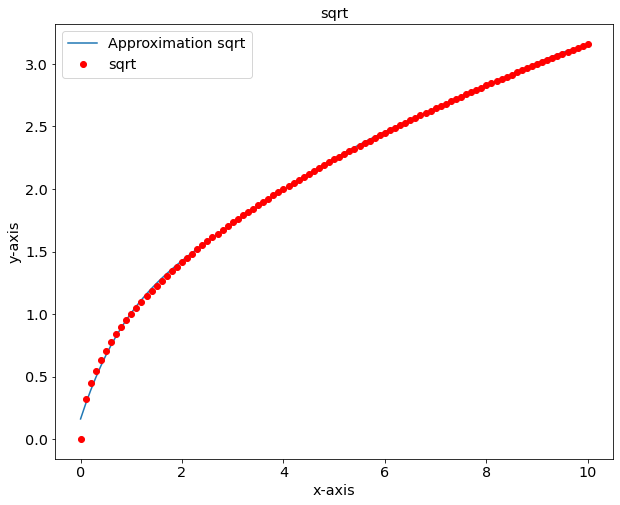

Relative error for sqrt and 6 degree is 0.00893490825179168 %


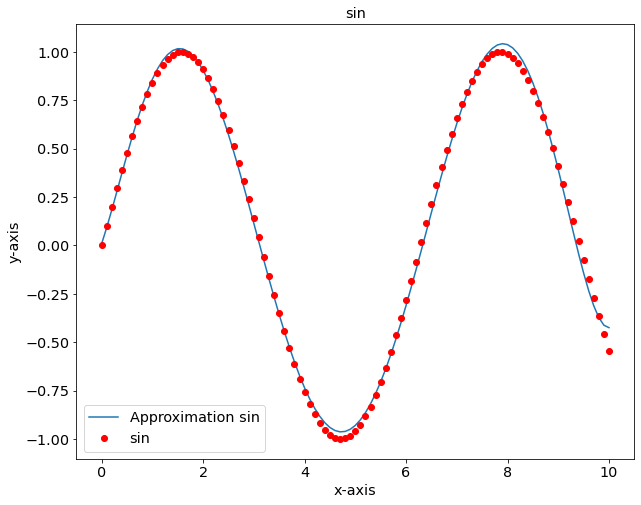

Relative error for sin and 6 degree is 0.138619088380601 %


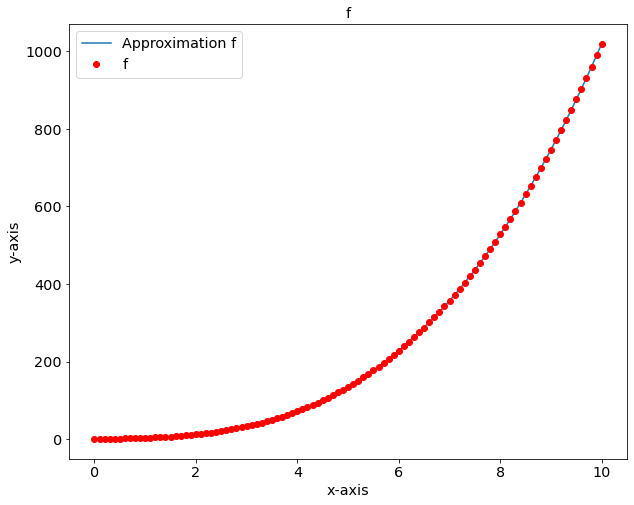

Relative error for f = x^3 + 2x and 6 degree is 1.27206645821569E-11 %


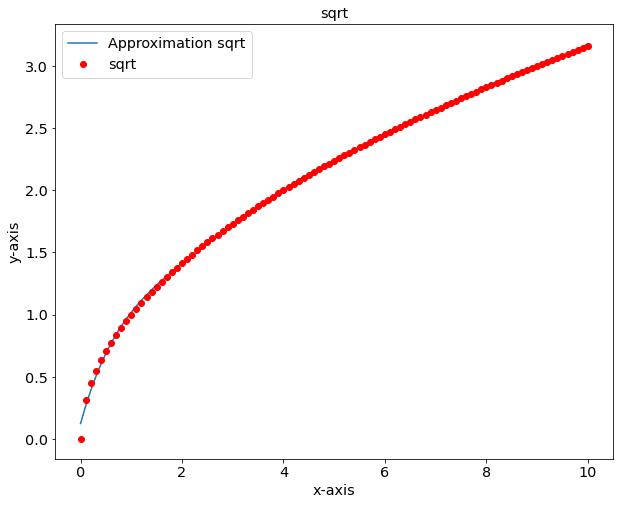

Relative error for sqrt and 7 degree is 0.00866643368732975 %


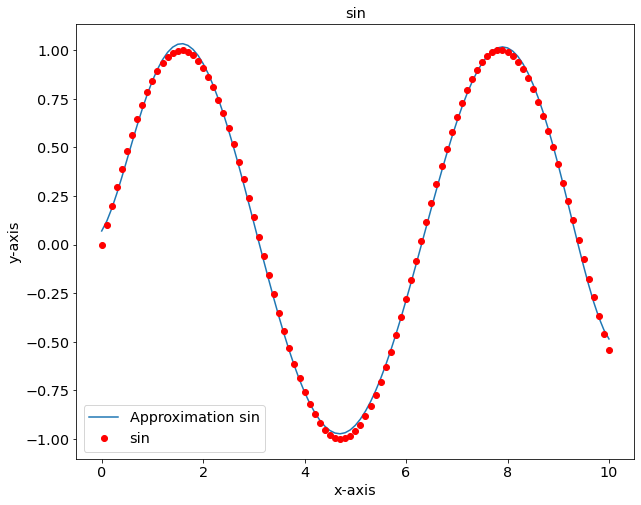

Relative error for sin and 7 degree is 0.116173490268343 %


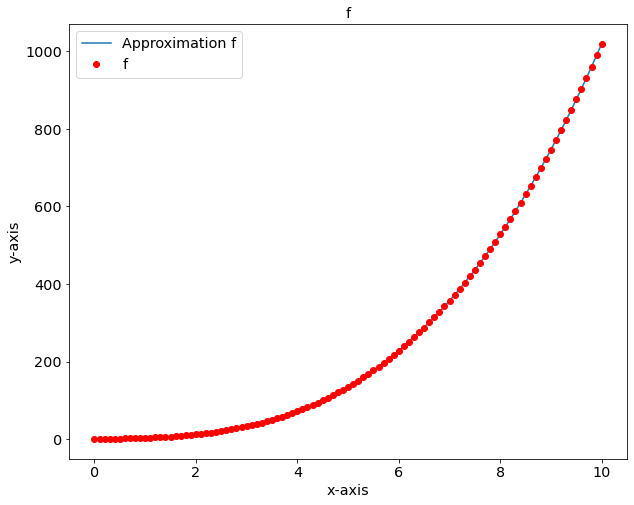

Relative error for f = x^3 + 2x and 7 degree is 3.97360230431718E-10 %


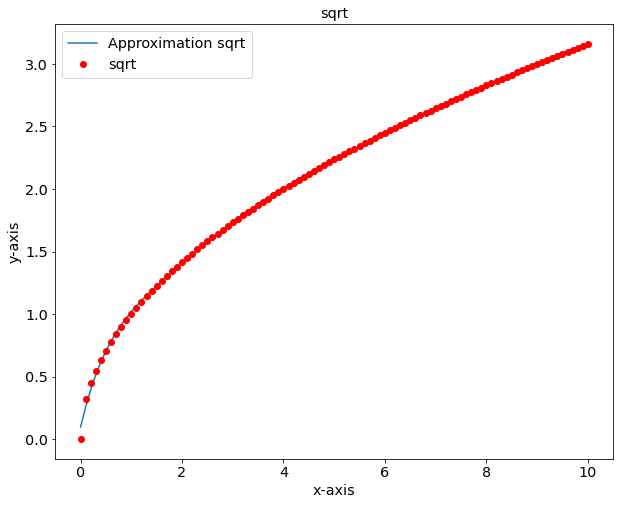

Relative error for sqrt and 8 degree is 0.00825498650752771 %


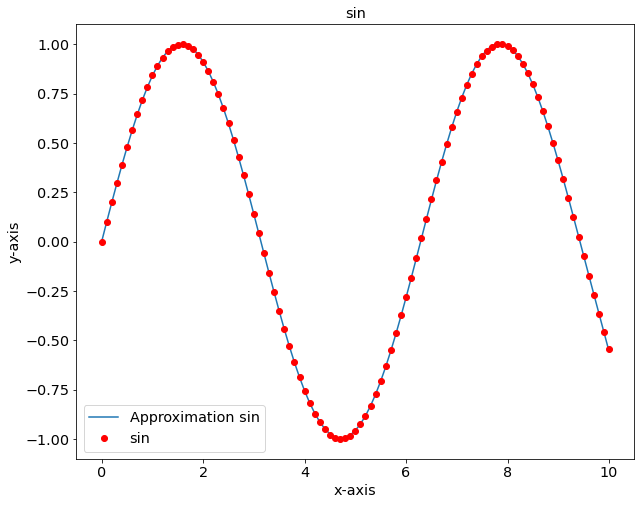

Relative error for sin and 8 degree is 0.0122221547194607 %


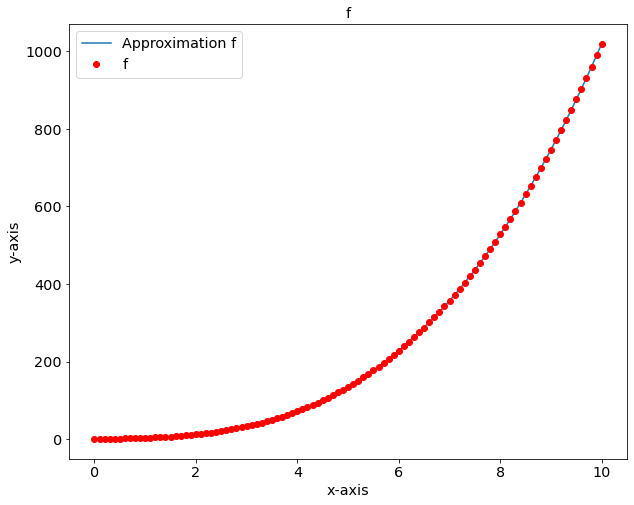

Relative error for f = x^3 + 2x and 8 degree is 2.85039731619820E-9 %


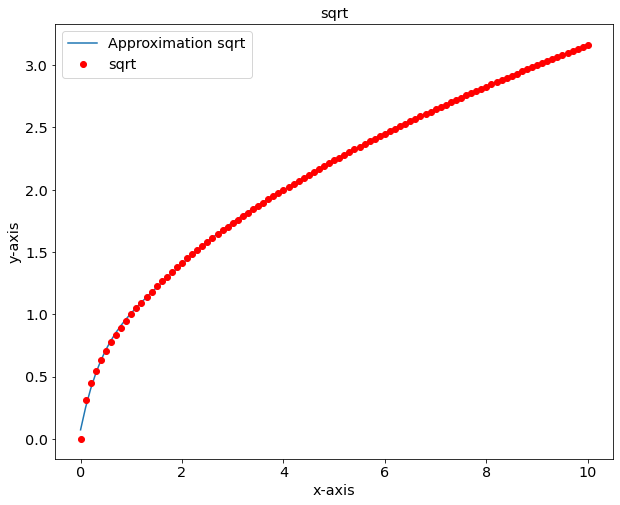

Relative error for sqrt and 9 degree is 0.00772840271207387 %


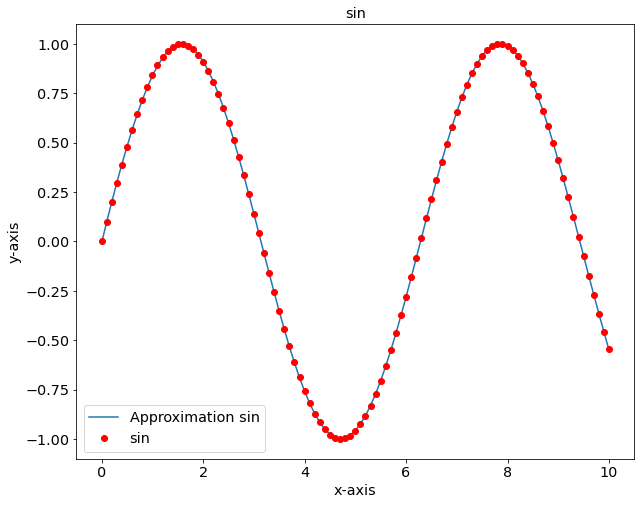

Relative error for sin and 9 degree is 0.00753649360720675 %


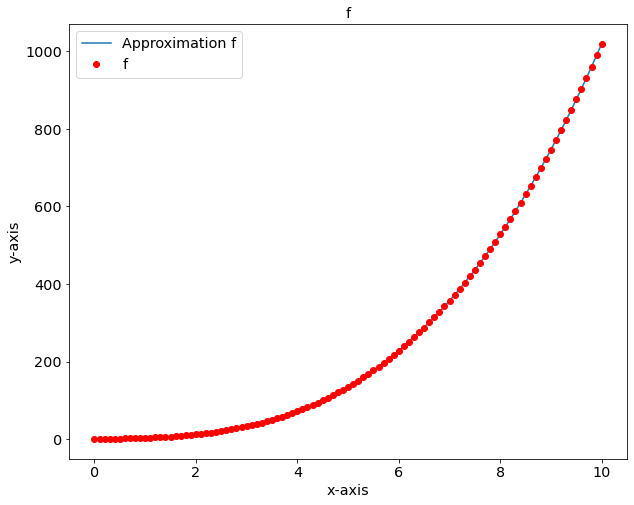

Relative error for f = x^3 + 2x and 9 degree is 1.14490964598484E-8 %


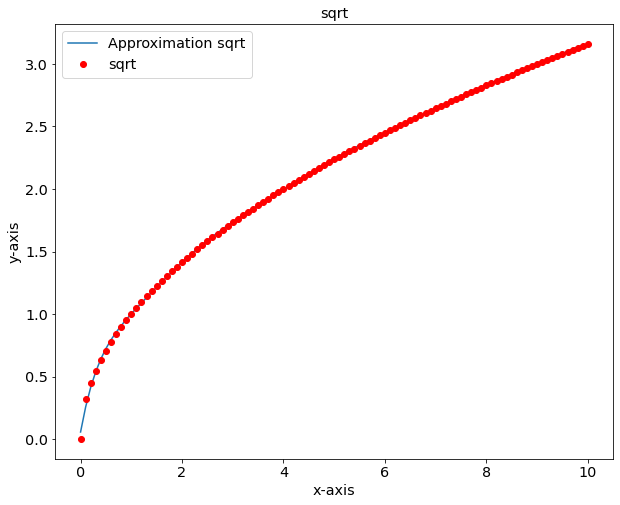

Relative error for sqrt and 10 degree is 0.00710750658576853 %


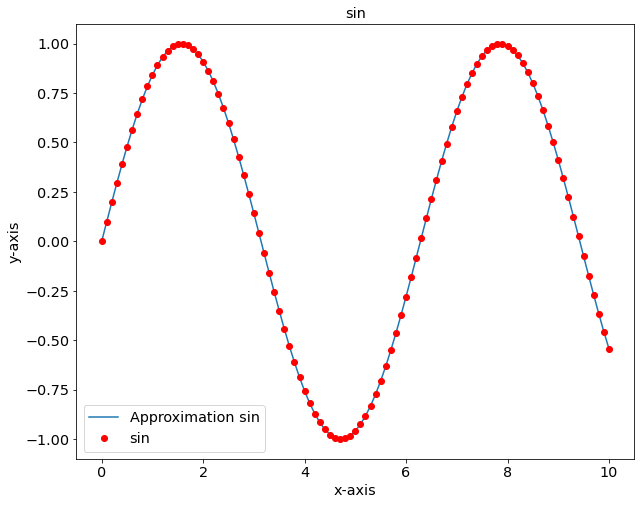

Relative error for sin and 10 degree is 0.000627345316603247 %


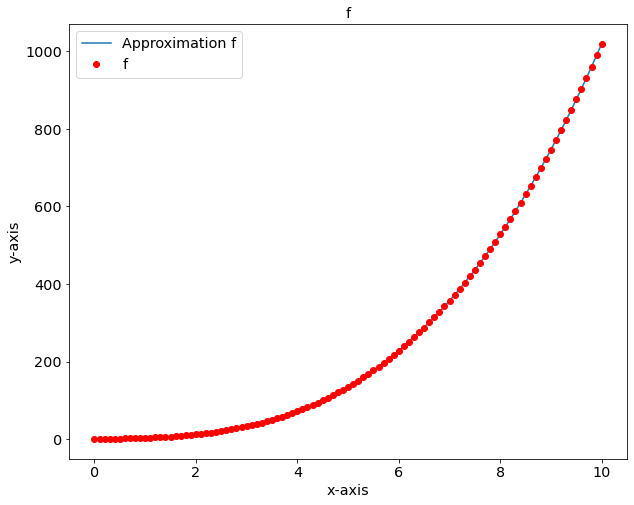

Relative error for f = x^3 + 2x and 10 degree is 1.03853196742792E-7 %


In [25]:
square_polynomial_approximation_to_M(0, 10, 100, False, 10)

#Aproksymacja funkcji zwrostu zachorowań koronawirusem dla dowolnego kraju :

In [0]:
def get_data_about_corona(country_code, option):
    response = requests.get('https://api.thevirustracker.com/free-api?countryTimeline=' + str(country_code))
    content = json.loads(response.text)
    content = content['timelineitems'][0]
    length = len(content)
    counter = 0
    date_array = []
    data = []

    for i in content:
        if counter < length - 1:
            data.append(content[str(i)][option])
            date_array.append(i)
        counter += 1

    return data, date_array


def calculate_value(polynomial, x):
    X = sympy.symbols('x')
    return polynomial.evalf(subs={X: x})


#country_code można znalezc dla dowolnego kraju pod tym adresem https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
def compare_charts(x_array, y_array, real_x_array, real_y_array, country_code, option):
    params = {'legend.fontsize': 'x-large',
                  'figure.figsize': (20, 12),
                  'axes.labelsize': 'x-large',
                  'axes.titlesize': 'x-large',
                  'xtick.labelsize': 'x-large',
                  'ytick.labelsize': 'x-large'}
    plt.rcParams.update(params)
    plt.plot(x_array, y_array, label="Approximation function for "+country_code)
    plt.plot(real_x_array, real_y_array, 'or', label="Real function for "+country_code)
    plt.grid(True, which='both')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.xticks(rotation=90)
    plt.title(option)
    plt.legend()
    plt.show()


options = ['total_cases', 'total_recoveries', 'total_deaths']


def approximate_corona(country_code, degree):
    for option in options:
        data, date_array = get_data_about_corona(country_code, option)
        polynomial = square_polynomial_approximation(np.linspace(1, len(data), len(data)), data, degree)
        y_array = []
        for i in range(1, len(data)+1):
            y_array.append(calculate_value(polynomial, i))
        compare_charts(date_array, y_array, date_array, data, country_code, option)


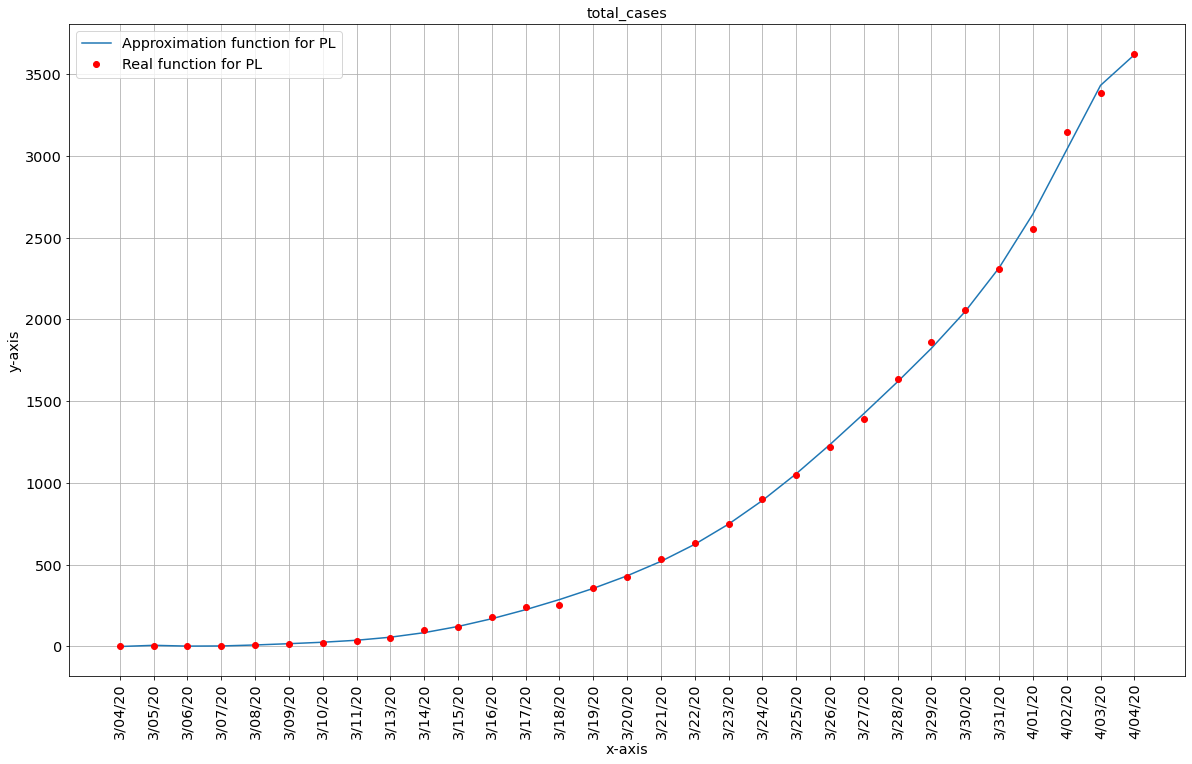

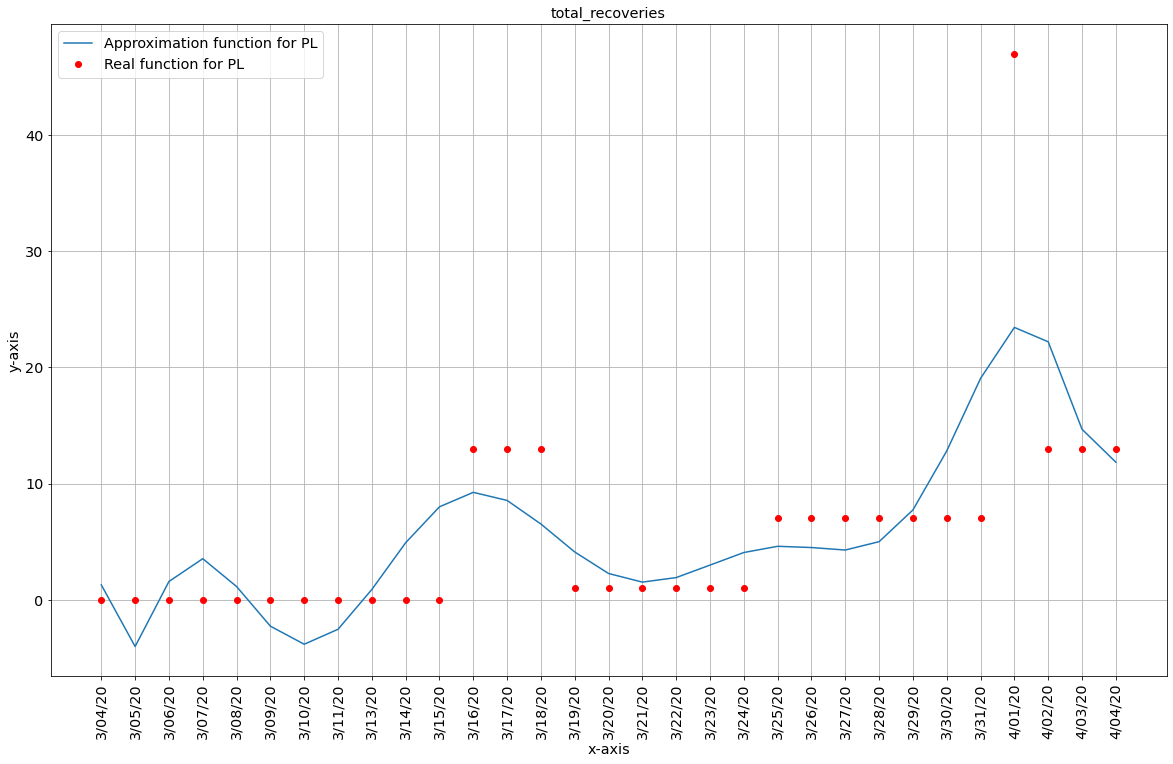

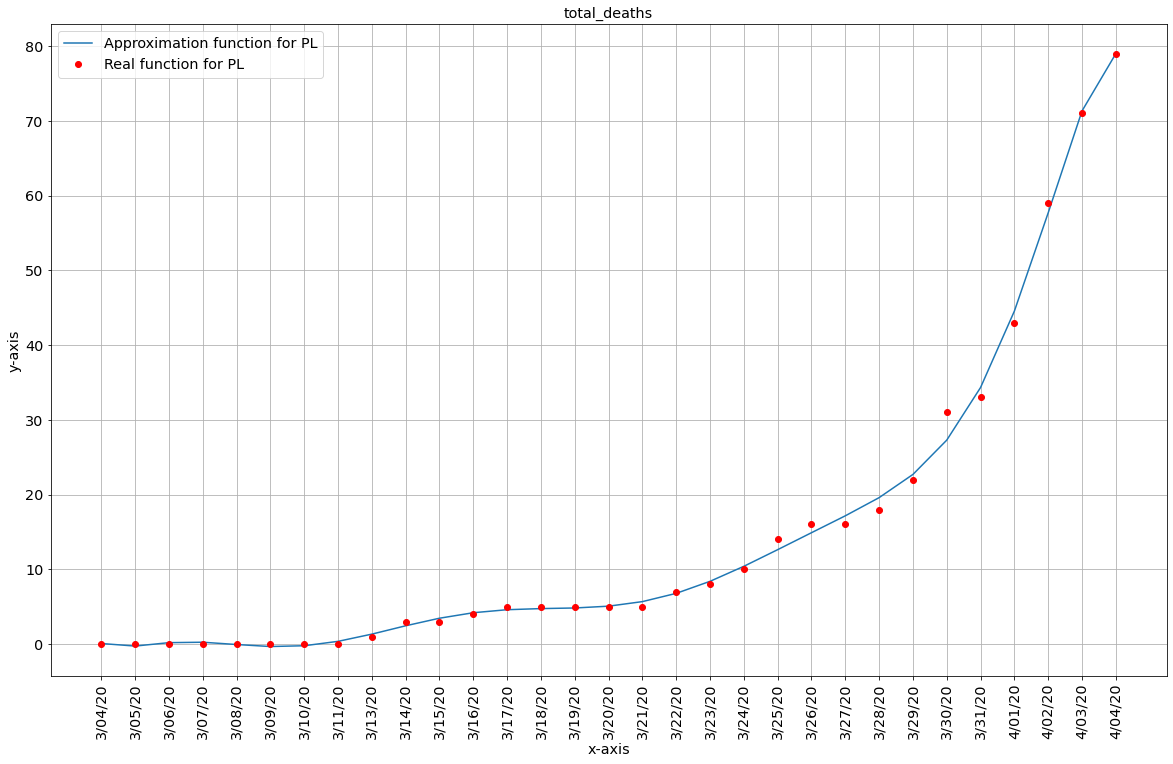

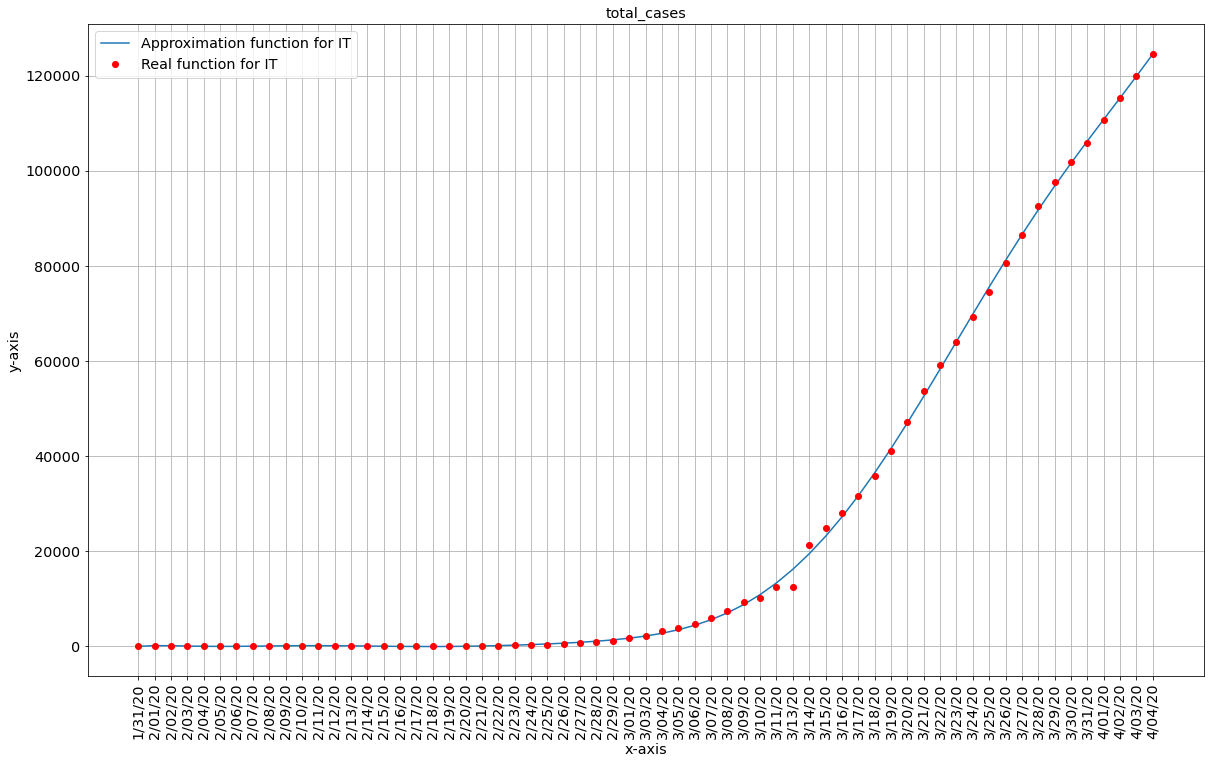

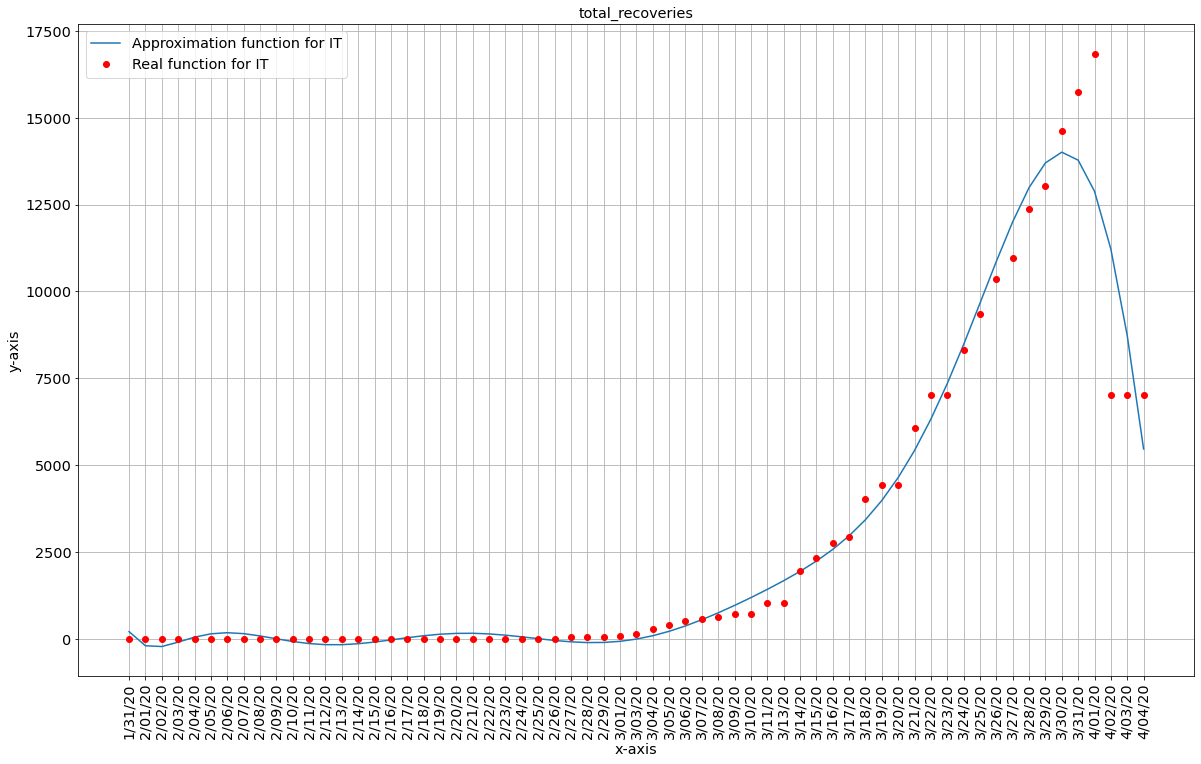

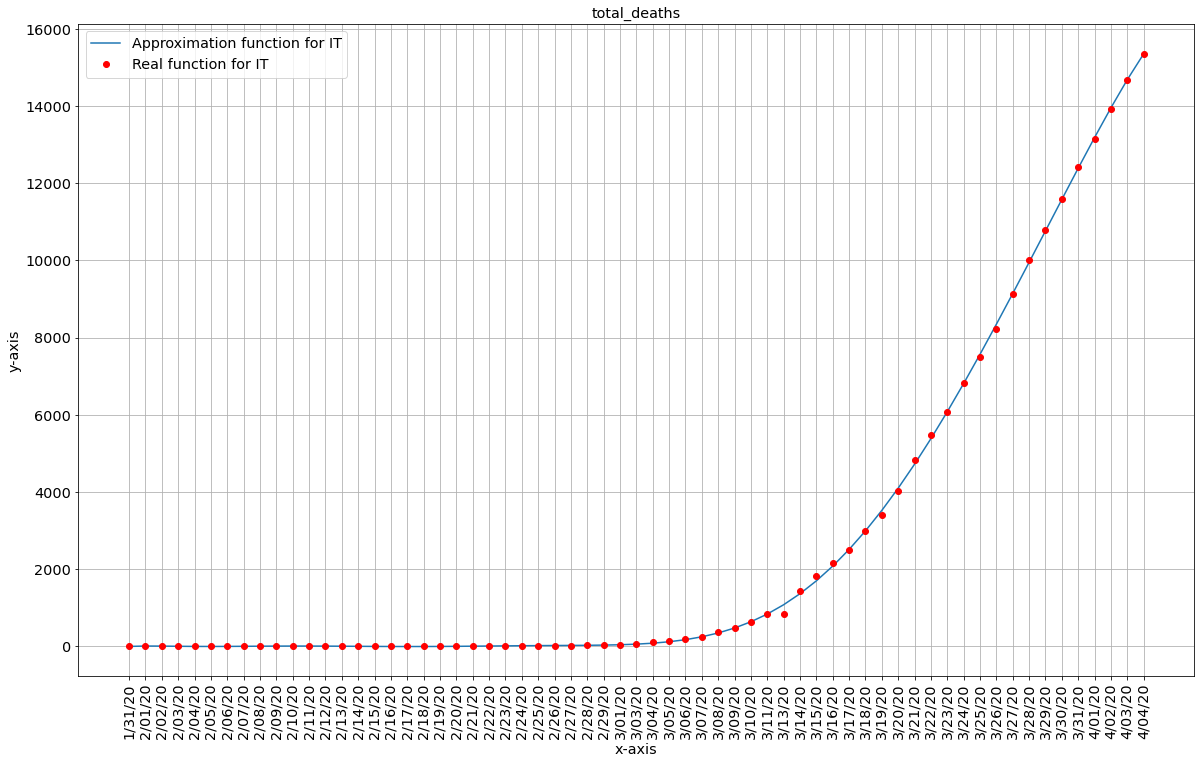

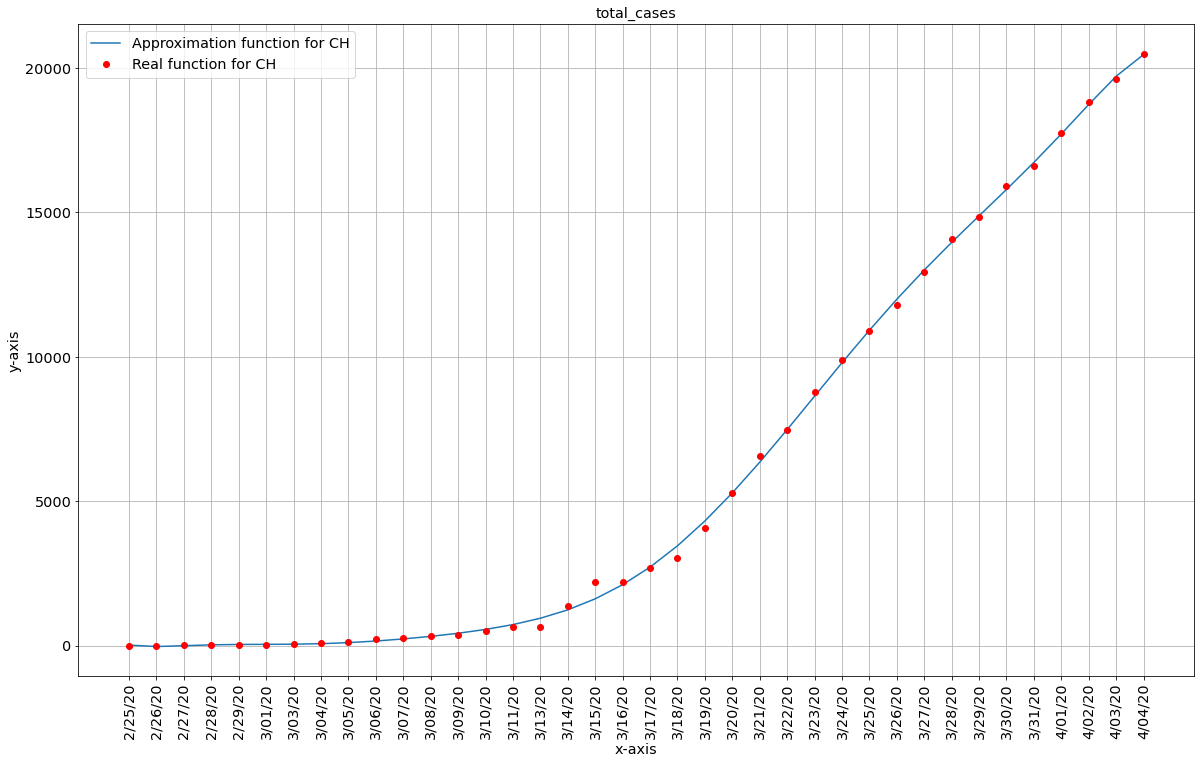

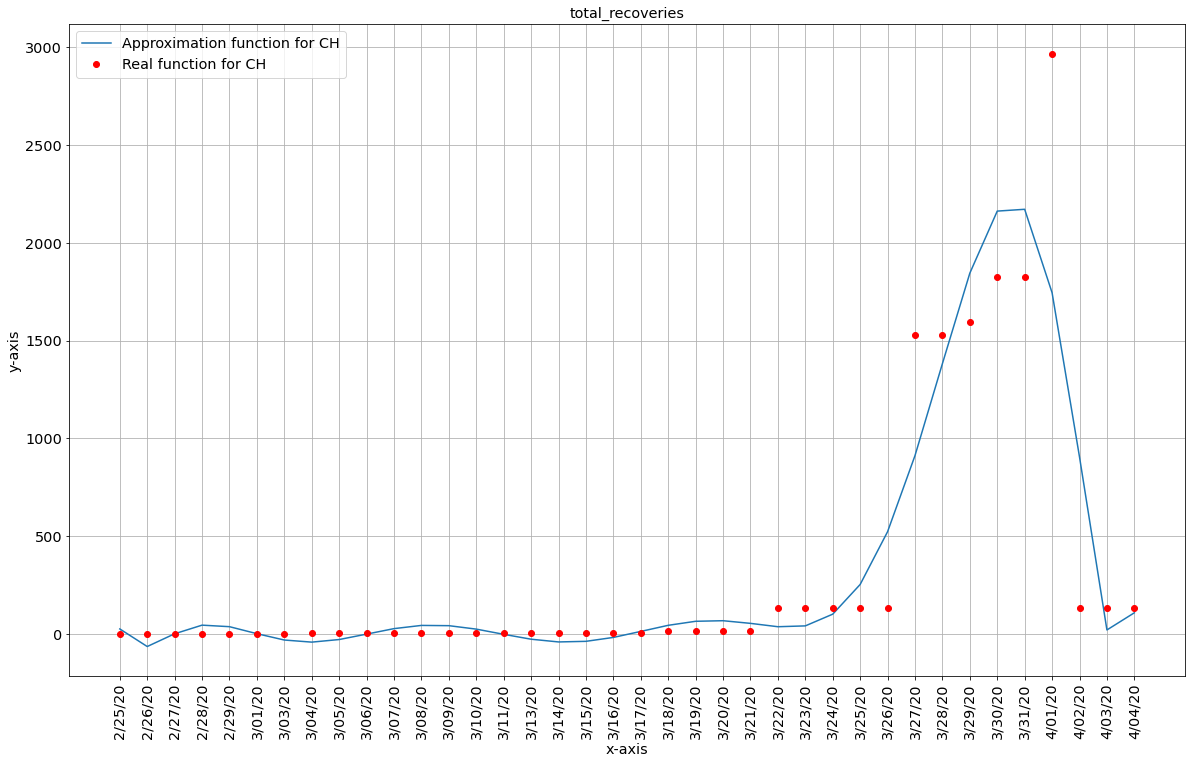

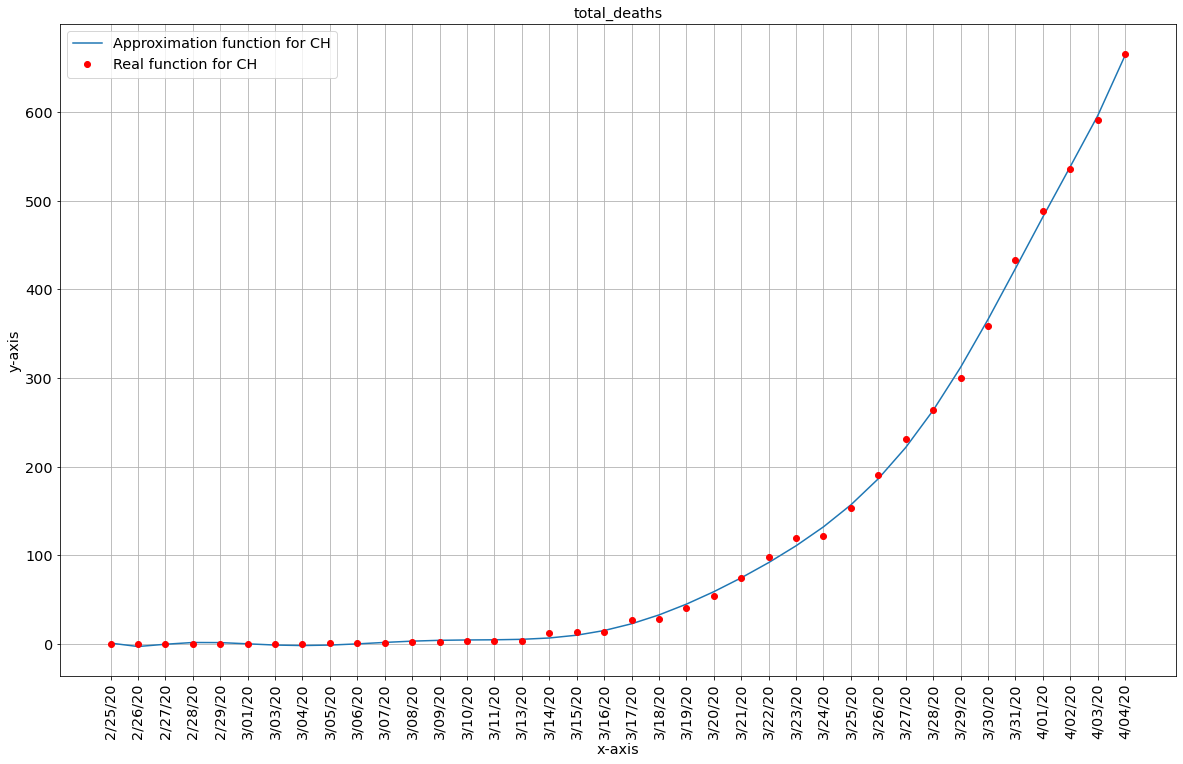

In [31]:
approximate_corona("PL", 10)
approximate_corona("IT", 10)
approximate_corona("CH", 10)

#Wnioski
Z powyższych wykresów widzimy im większy stopień stopień wielomianu aproksymującego, tym mniejszy jest błąd, jednak ten stopień powienien być znacznie mniejszy od liczby węzłów, aby
„wygładzić” ewentualne błędy pomiarowe.
Podstawowym kryterium, którym kierujemy się przy wyborze wystarczającego stopnia wielomianu aproksymującego jest tzw. metoda wzrokowa – choć naturalnie może mieć ona zastosowanie jedynie do punktów w przestrzeni co najwyżej trójwymiarowej, czyli po prostu przyglądamy się rozmieszczeniu punktów i na tej podstawie dobieramy stopień np. dla funkcji f(x) = x^3+2x stopien 3 jest już wystarczający.

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 

In [0]:
def python_approximate(min, max, number_of_points, degree):
    for i in range(1, degree+1):
        f = lambda x: pow(x, 3) + 2 * x
        sqrt_x_array, sqrt_y_array = func_to_table(min, max, number_of_points, np.math.sqrt, "sqrt(x)", False)
        f_x_array, f_y_array = func_to_table(min, max, number_of_points, f, "x^3 + 2*x", False)
        sin_x_array, sin_y_array = func_to_table(min, max, number_of_points, np.math.sin, "sin(x)", False)
        poly_sqrt = np.polyfit(sqrt_x_array, sqrt_y_array, deg=i, full=True)
        y_sqrt_approximate = np.polyval(poly_sqrt[0], sqrt_x_array)
        poly_sin = np.polyfit(sin_x_array, sin_y_array, deg=i, full=True)
        y_sin_approximate = np.polyval(poly_sin[0], sqrt_x_array)
        poly_f = np.polyfit(f_x_array, f_y_array, deg=i, full=True)
        y_f_approximate = np.polyval(poly_f[0], f_x_array)
        compare_charts(sqrt_x_array, y_sqrt_approximate, sqrt_x_array, sqrt_y_array, "sqrt", "sqrt approximate - {} degree".format(i))
        compare_charts(sin_x_array, y_sin_approximate, sin_x_array, sin_y_array, "sin", "sin approximate - {} degree".format(i))
        compare_charts(f_x_array, y_f_approximate, f_x_array, f_y_array, "f", "f = x^3+2x approximate - {} degree".format(i))


def approximate_corona_python(country_code, degree):
    for option in options:
        data, date_array = get_data_about_corona(country_code, option)
        polynomial = np.polyfit(np.linspace(1, len(data), len(data)), data, degree)
        y_array = np.polyval(polynomial, np.linspace(1, len(data), len(data)))
        compare_charts(date_array, y_array, date_array, data, country_code, option)


#Aproksymacja dla funkcji sin, sqrt oraz f(x) = x^3+2x dla stopni od 1 do 10 , 100 punktów przy użyciu numpy : 

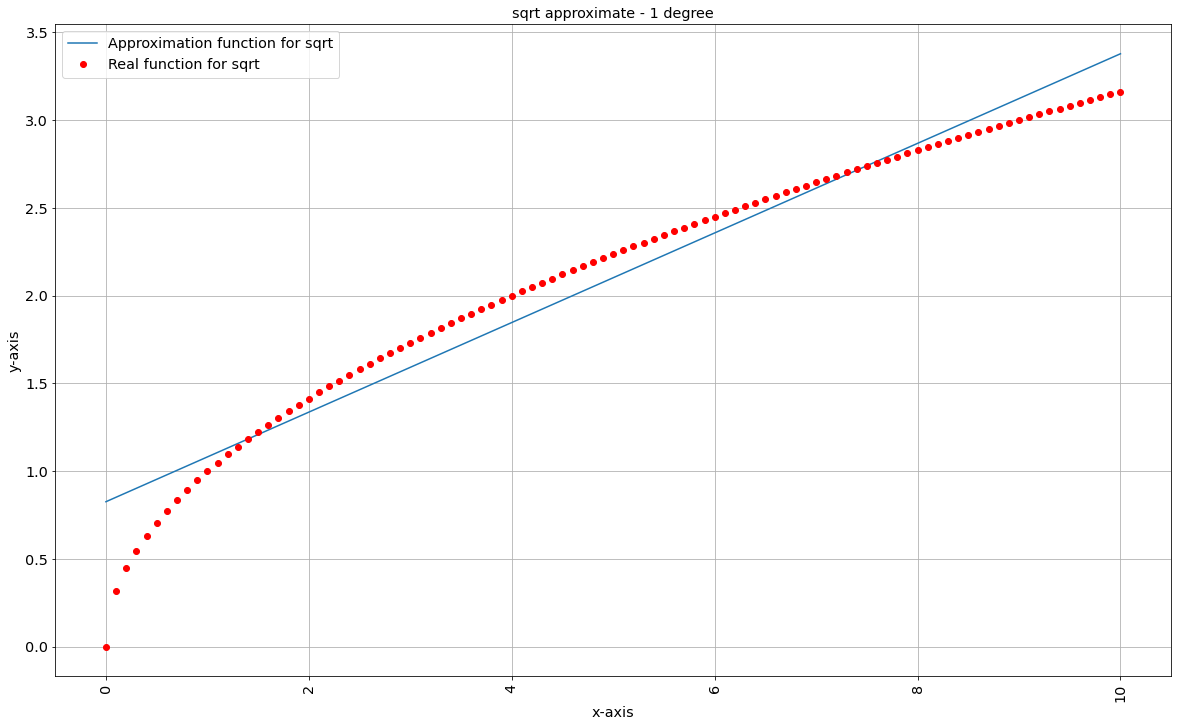

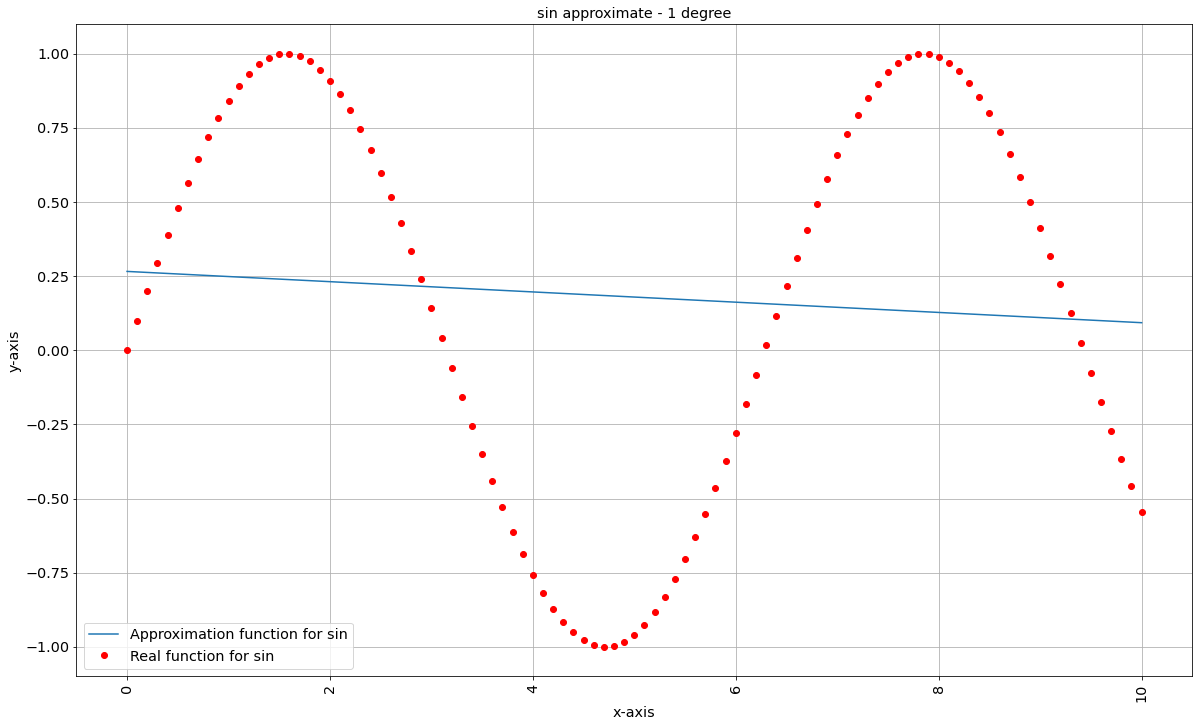

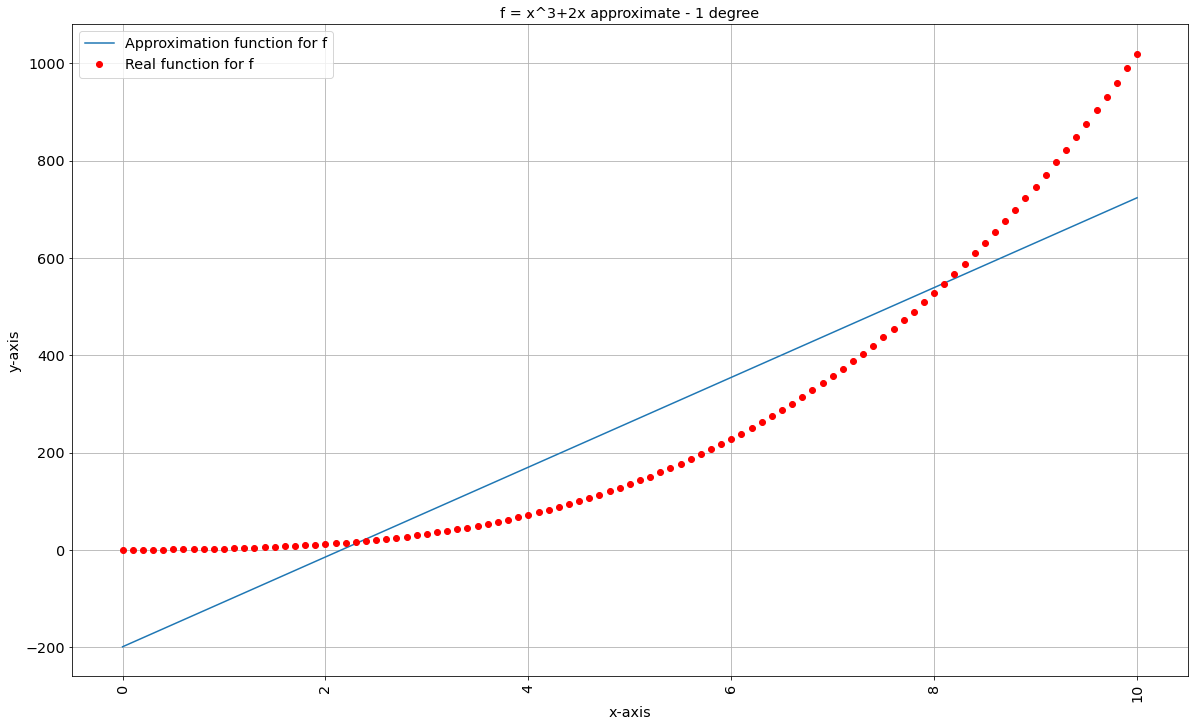

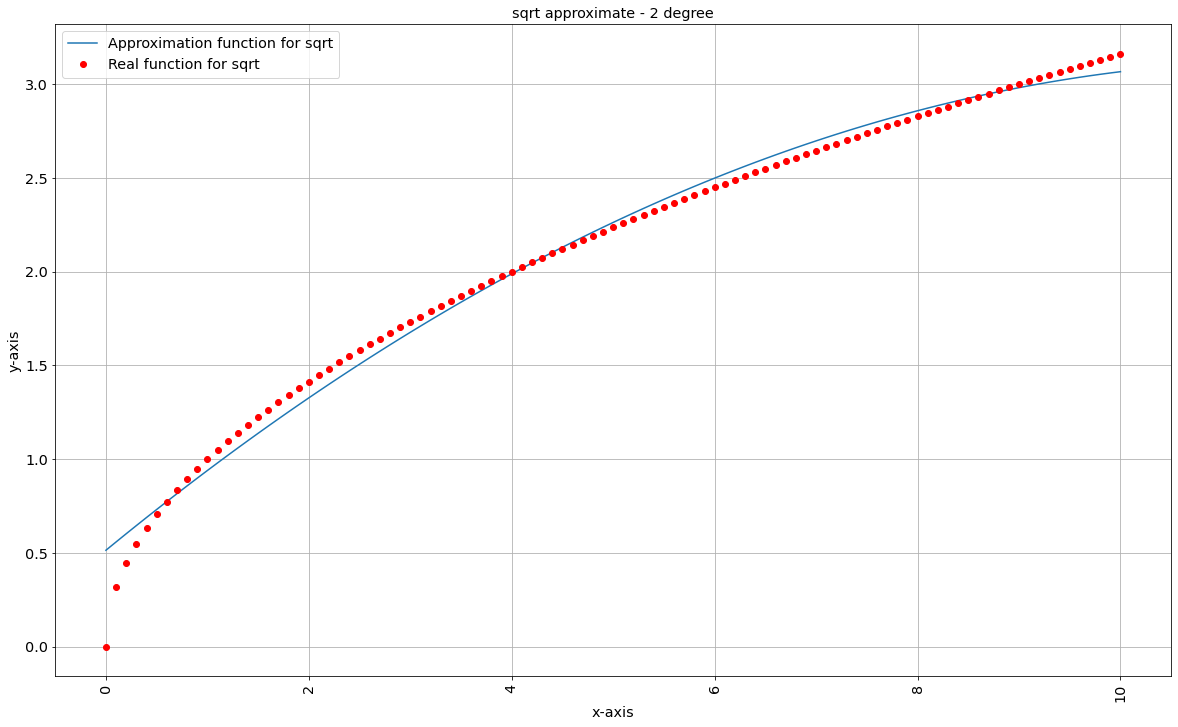

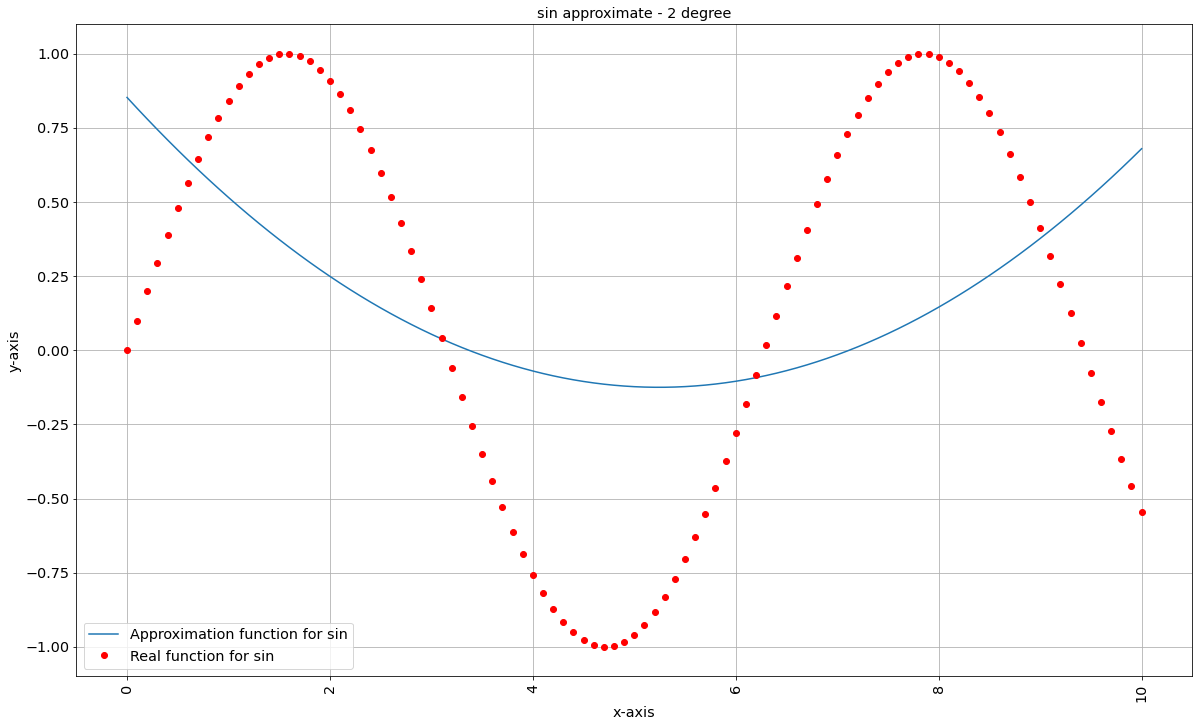

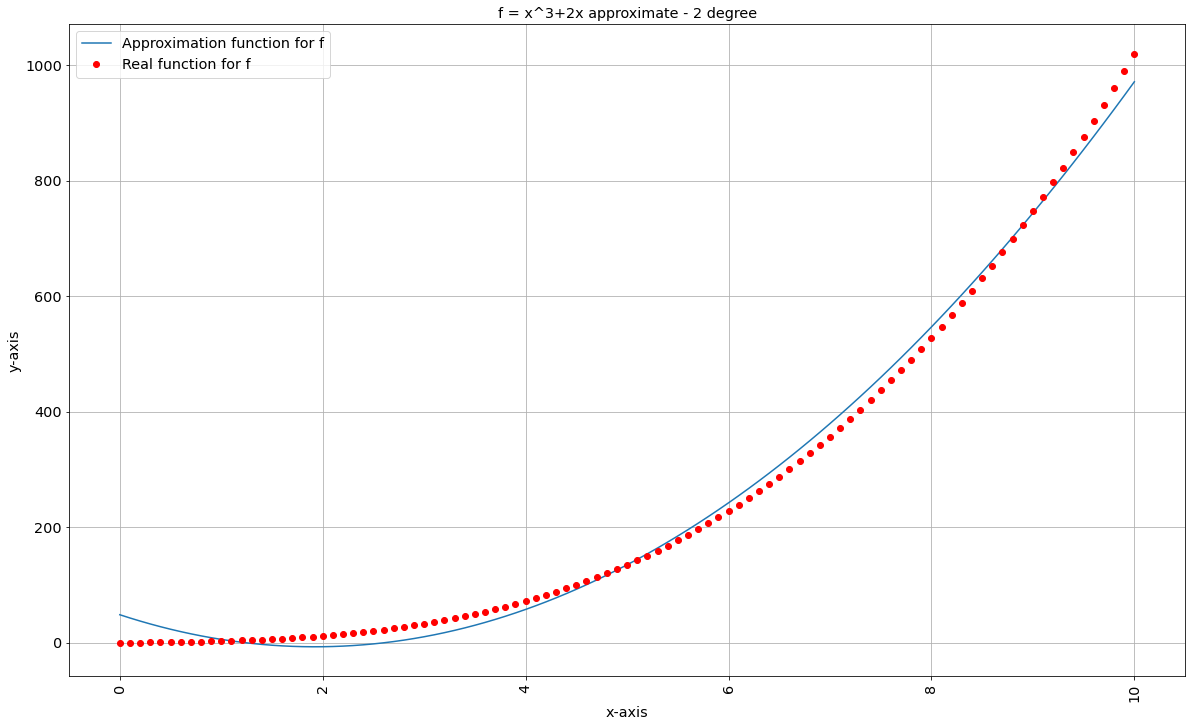

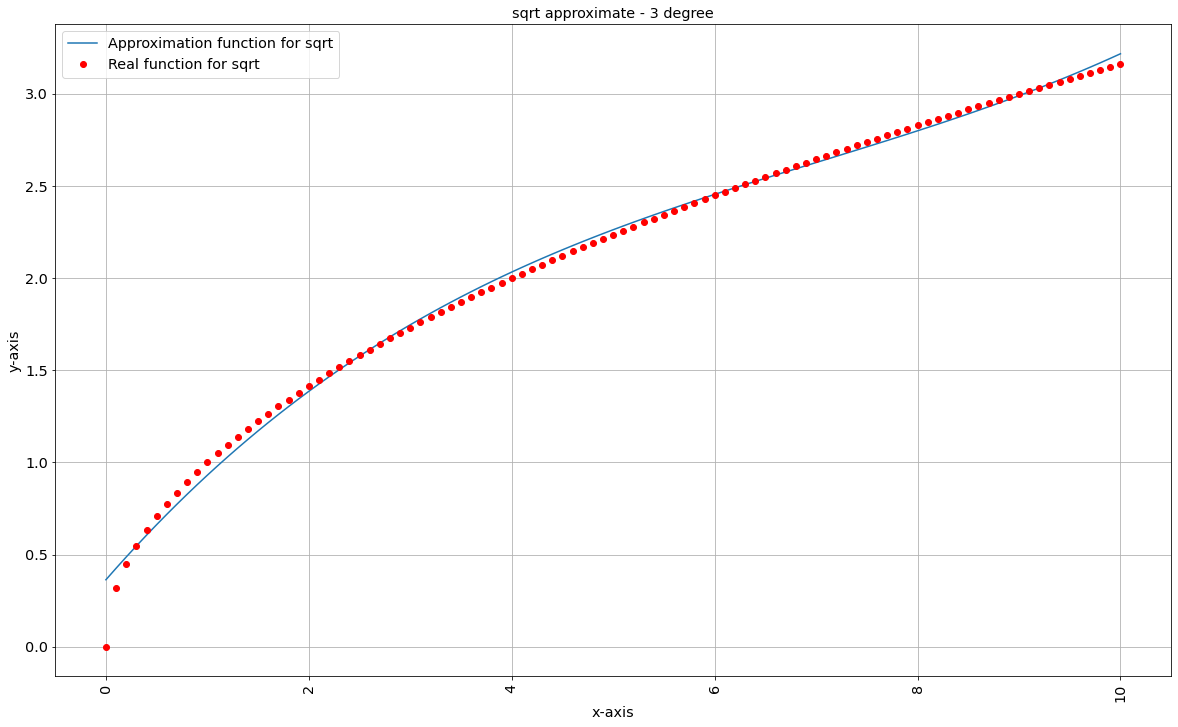

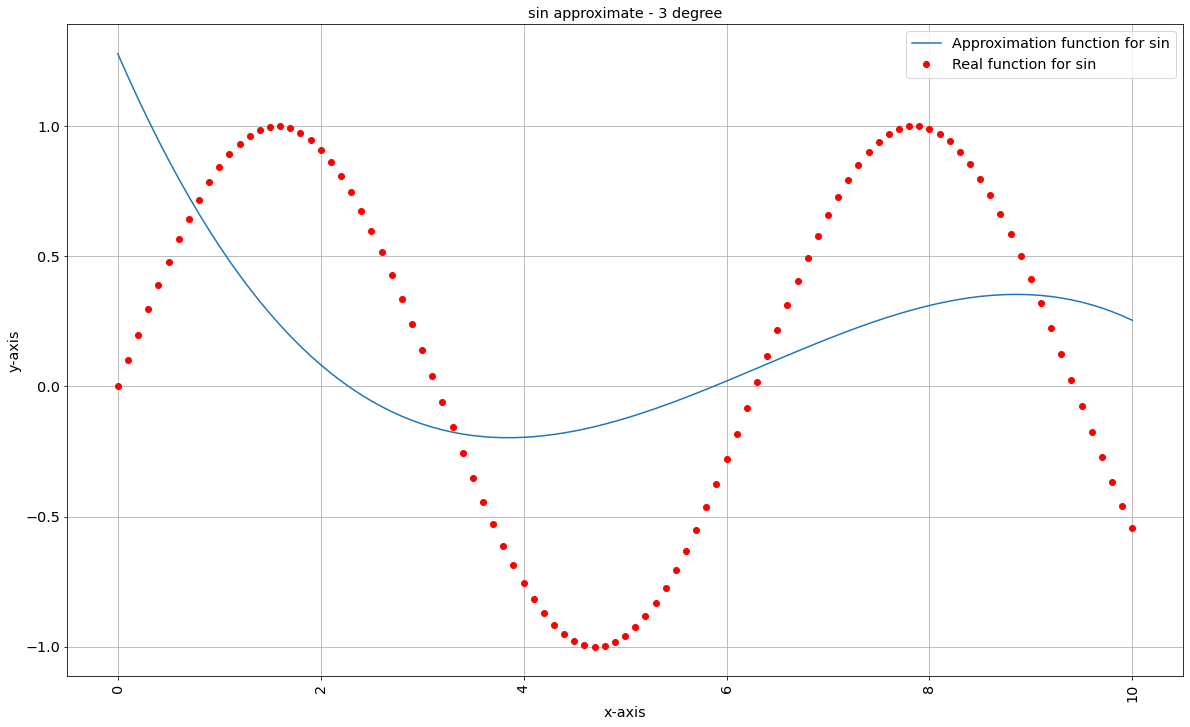

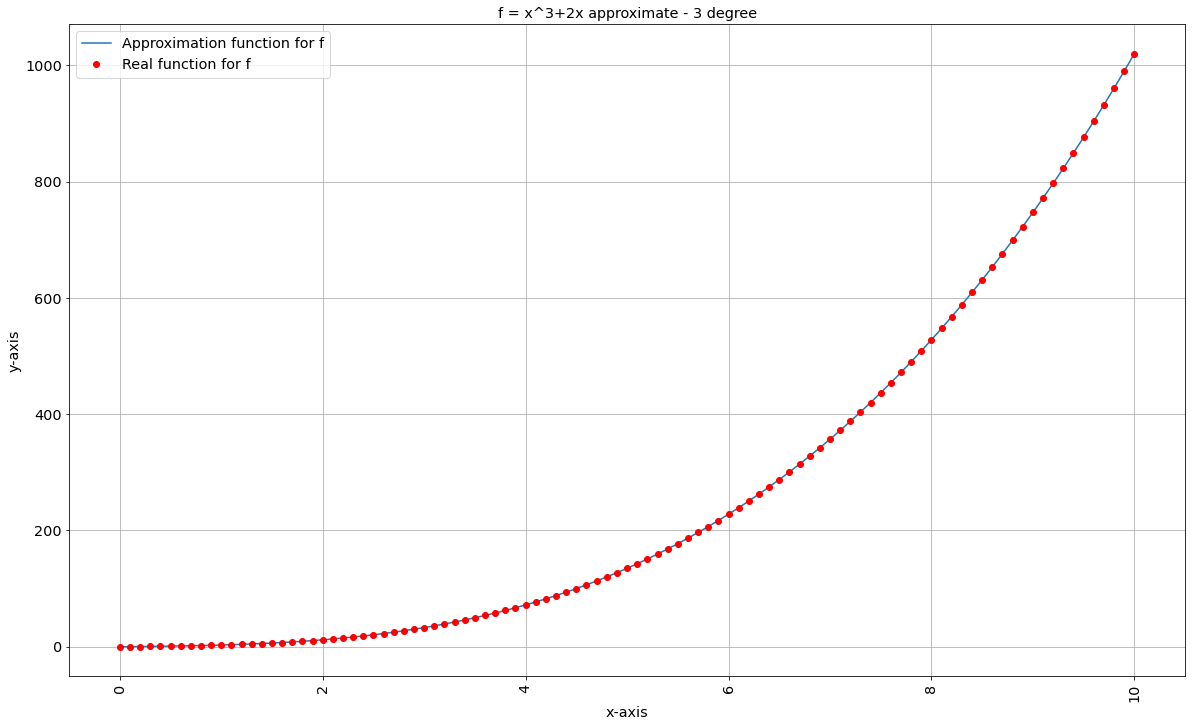

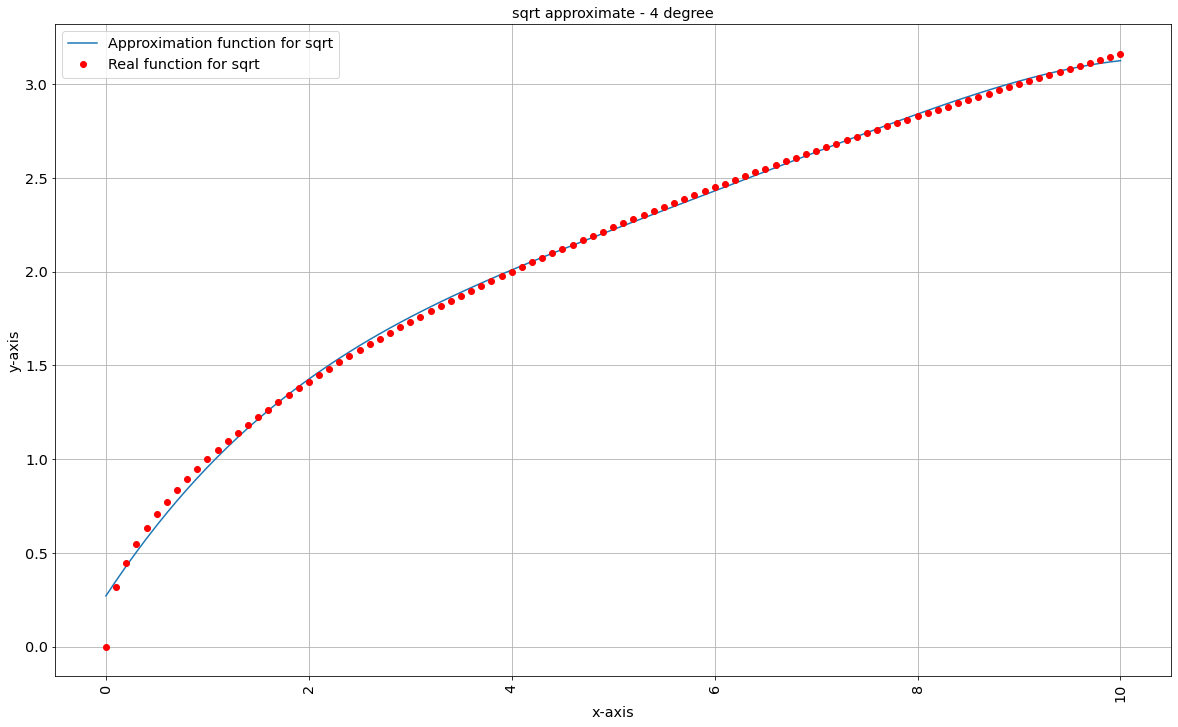

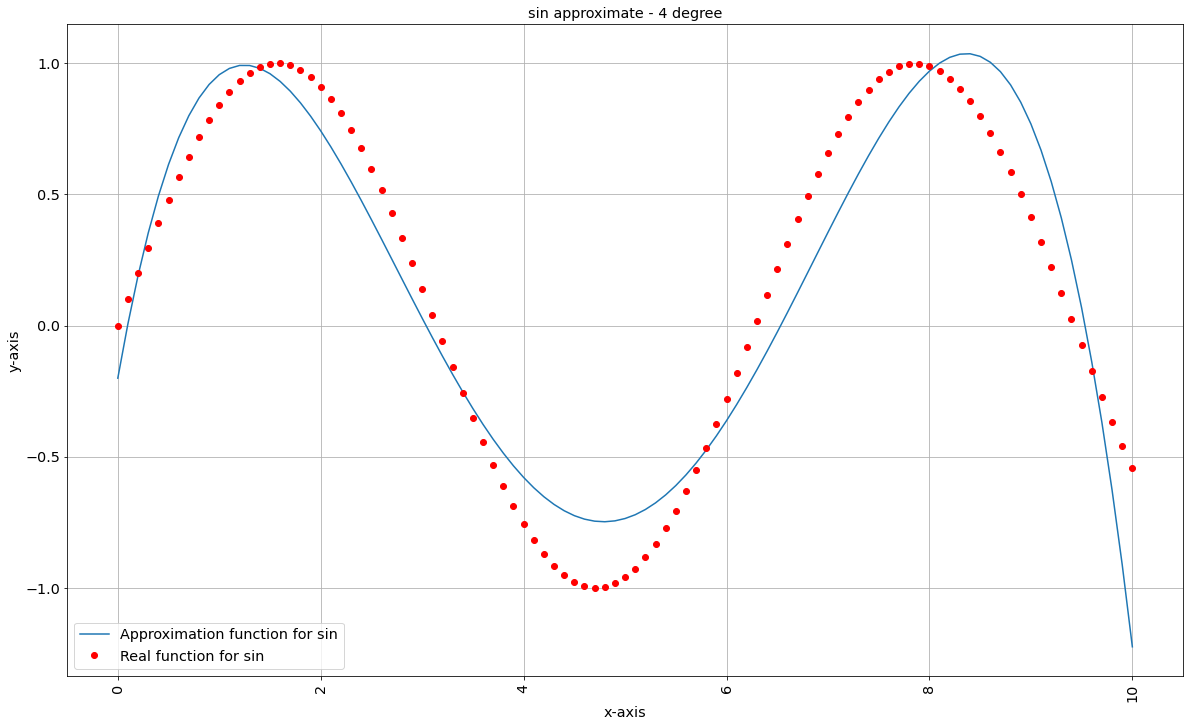

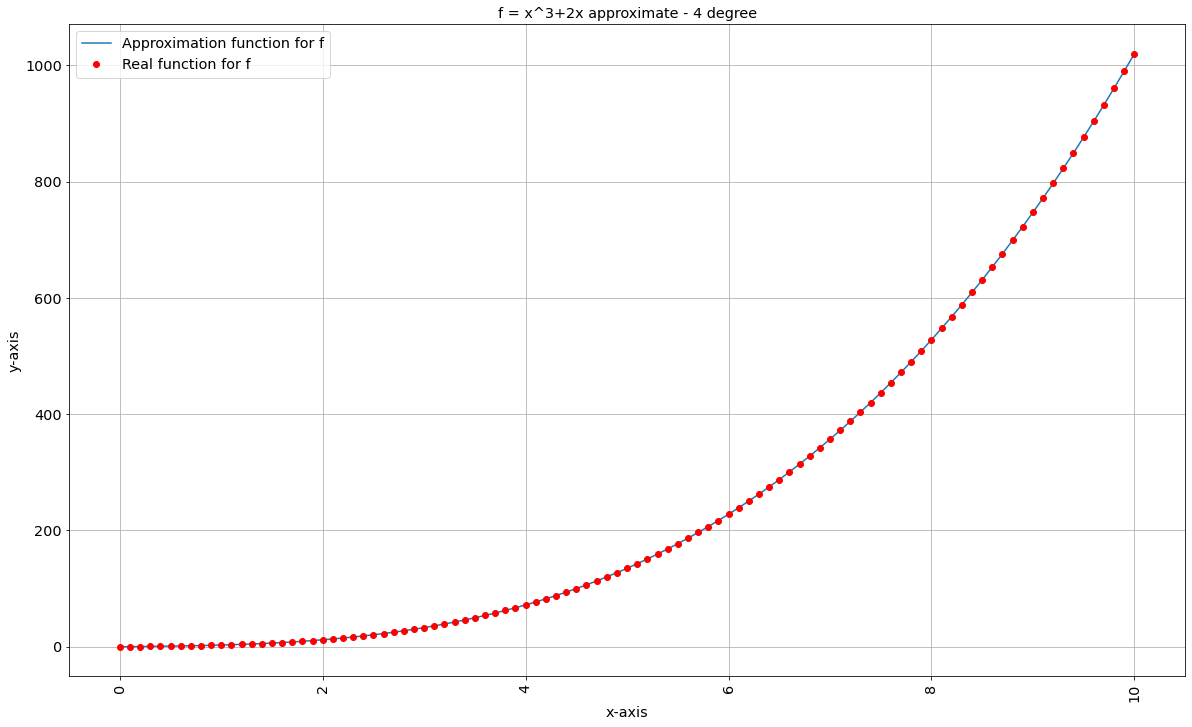

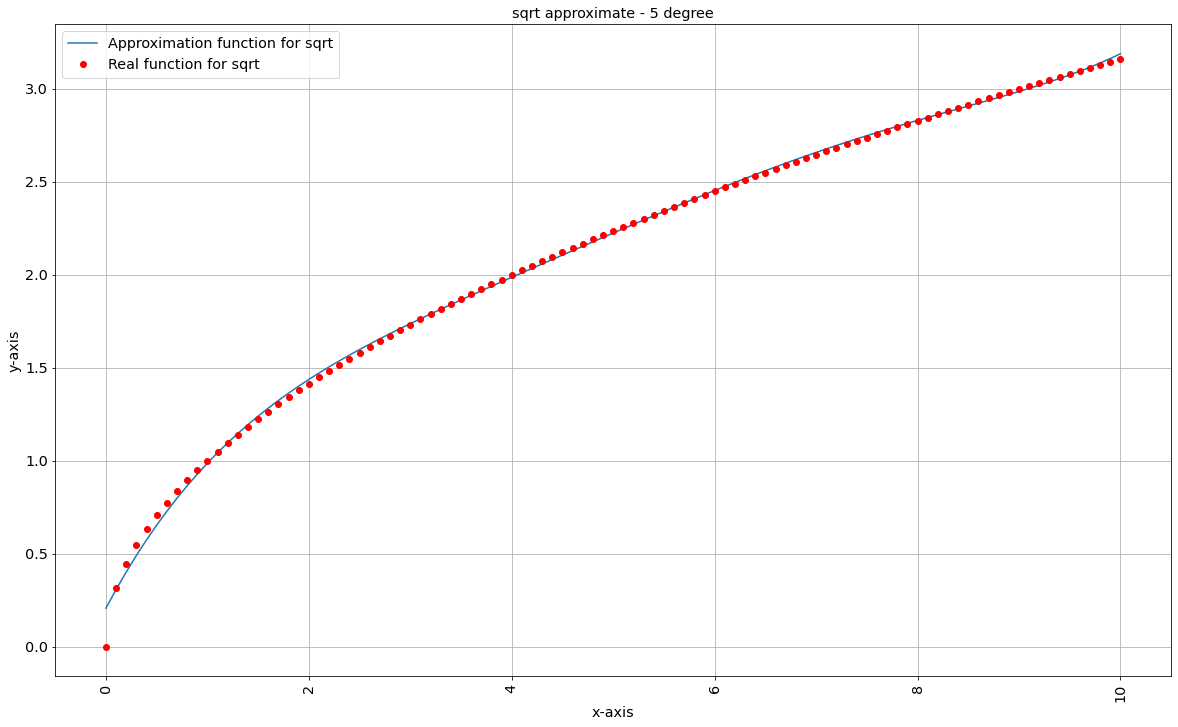

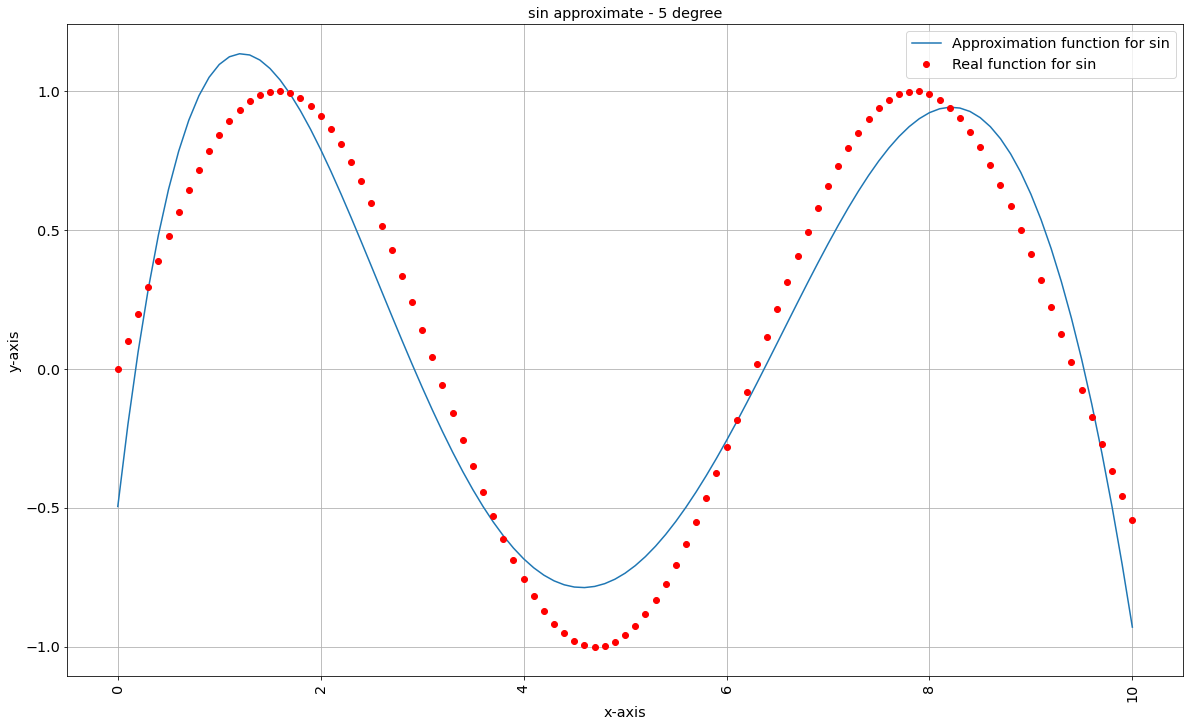

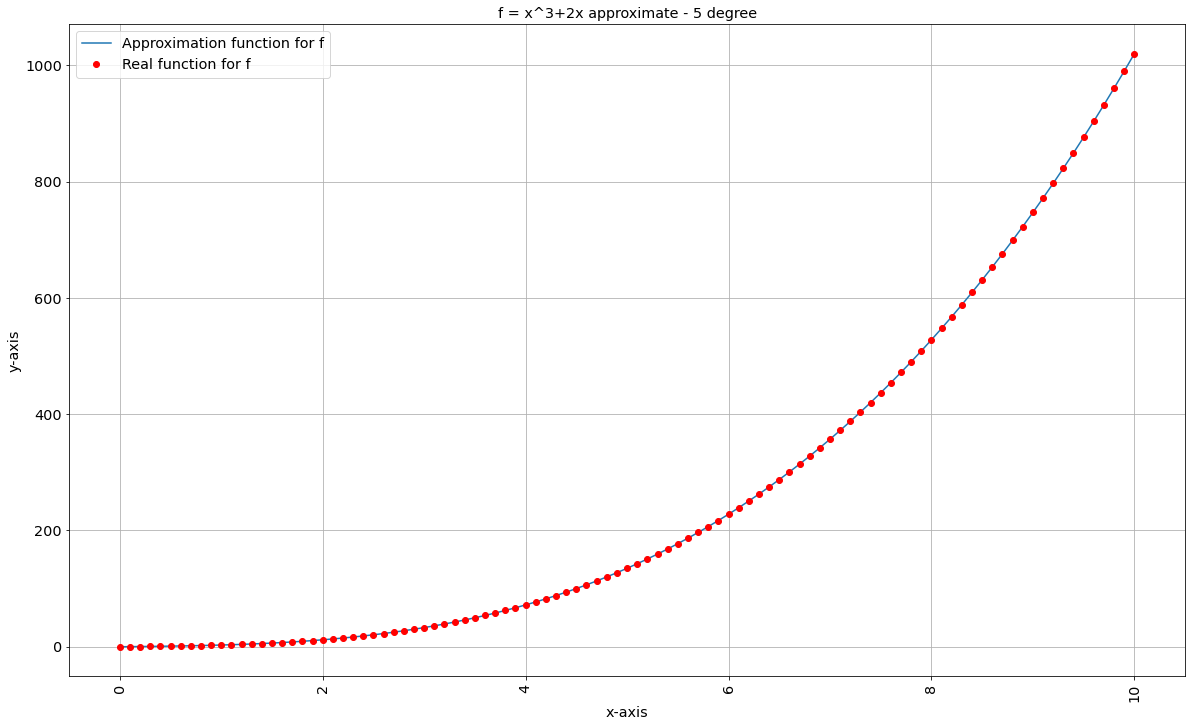

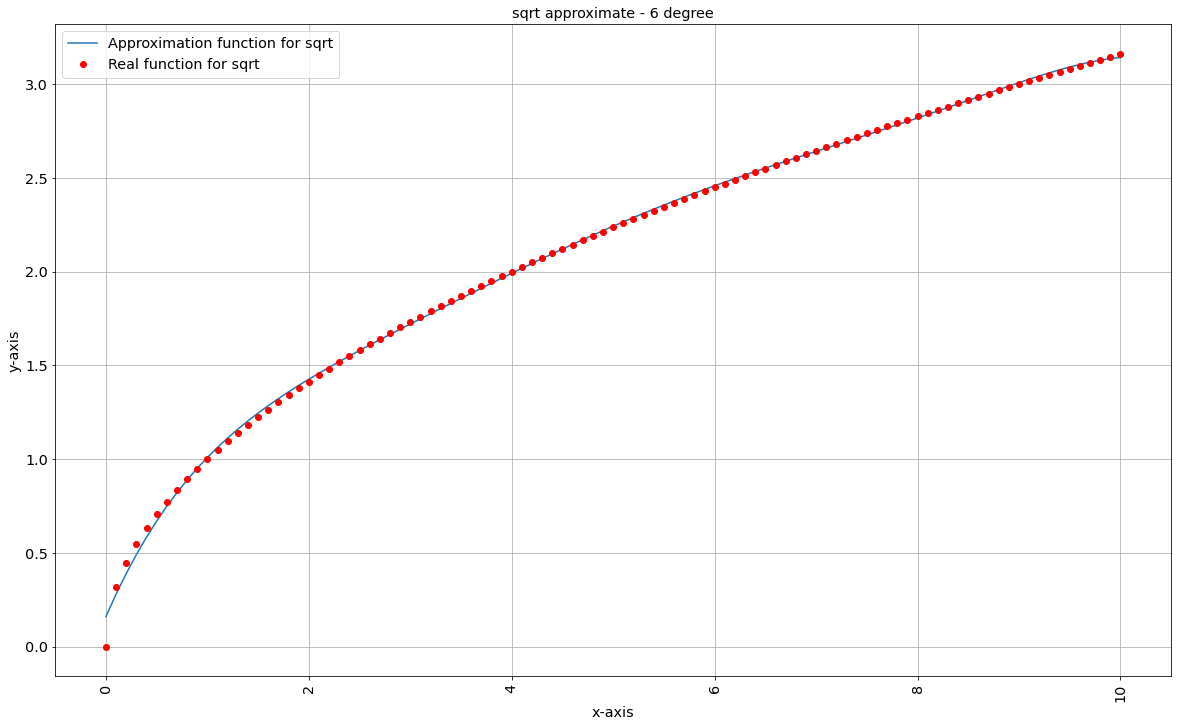

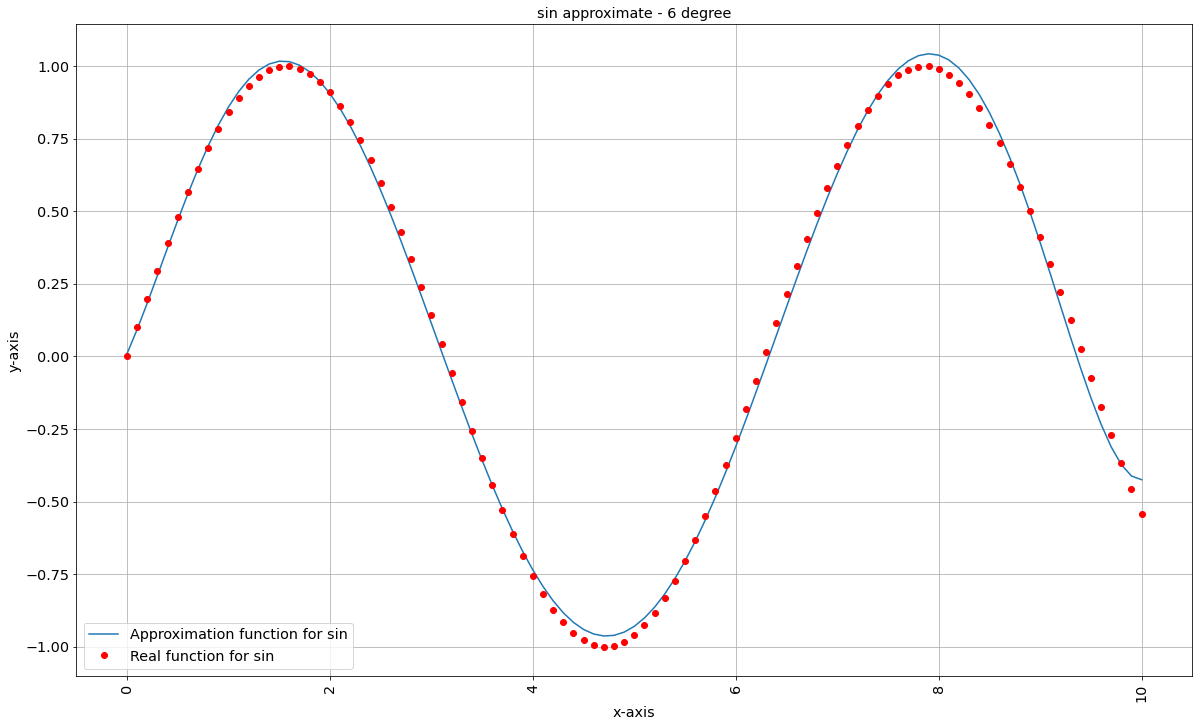

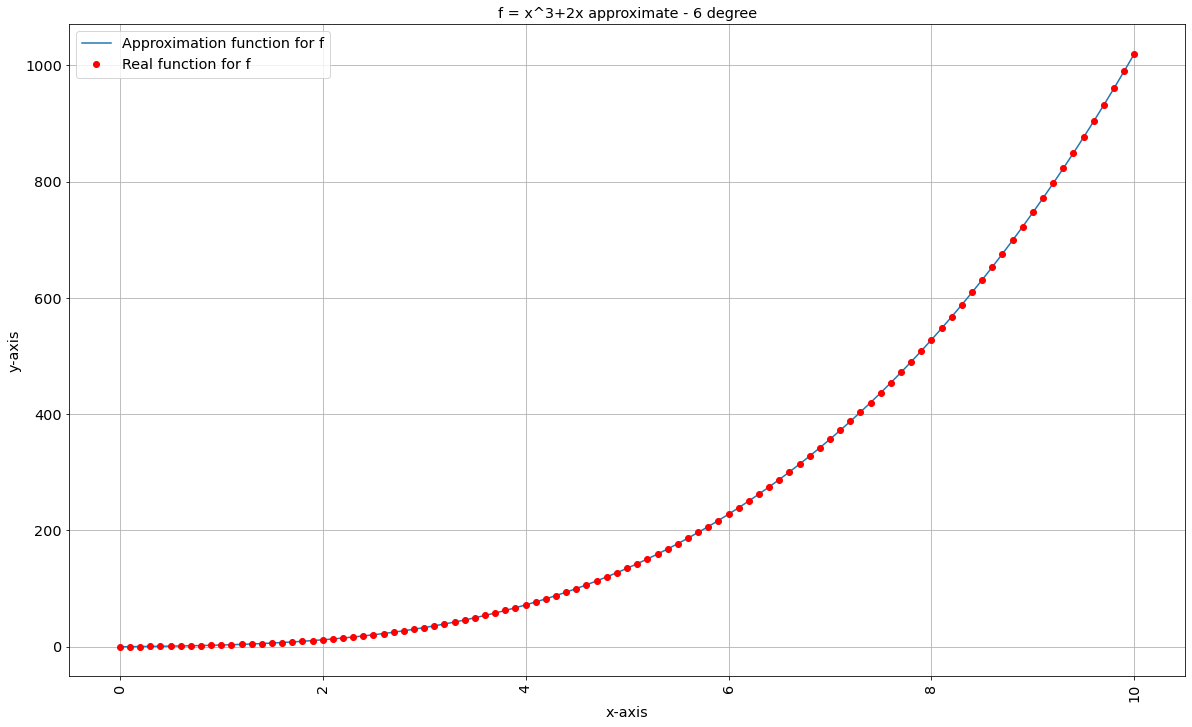

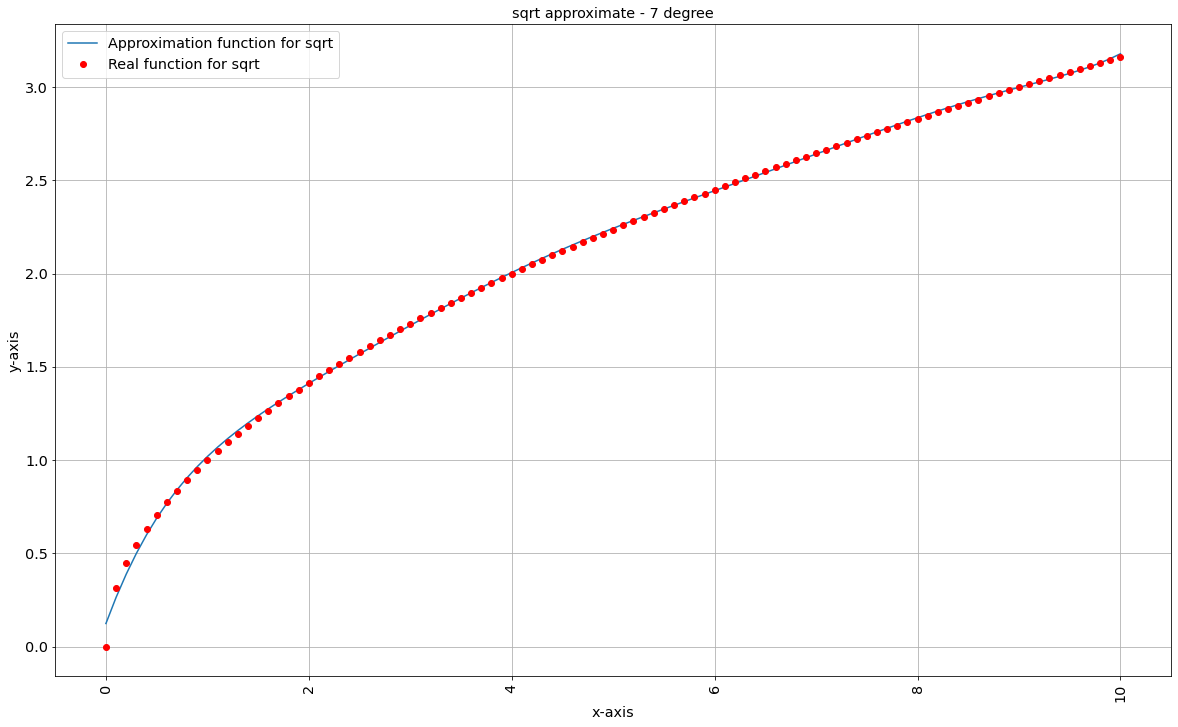

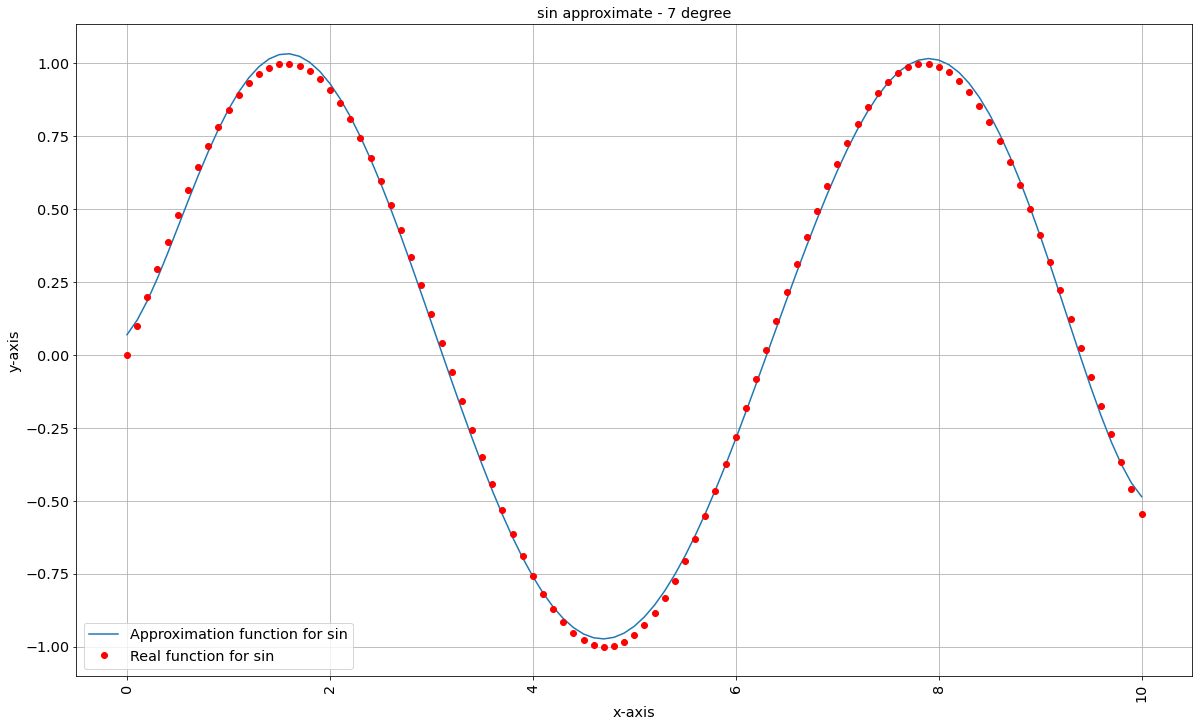

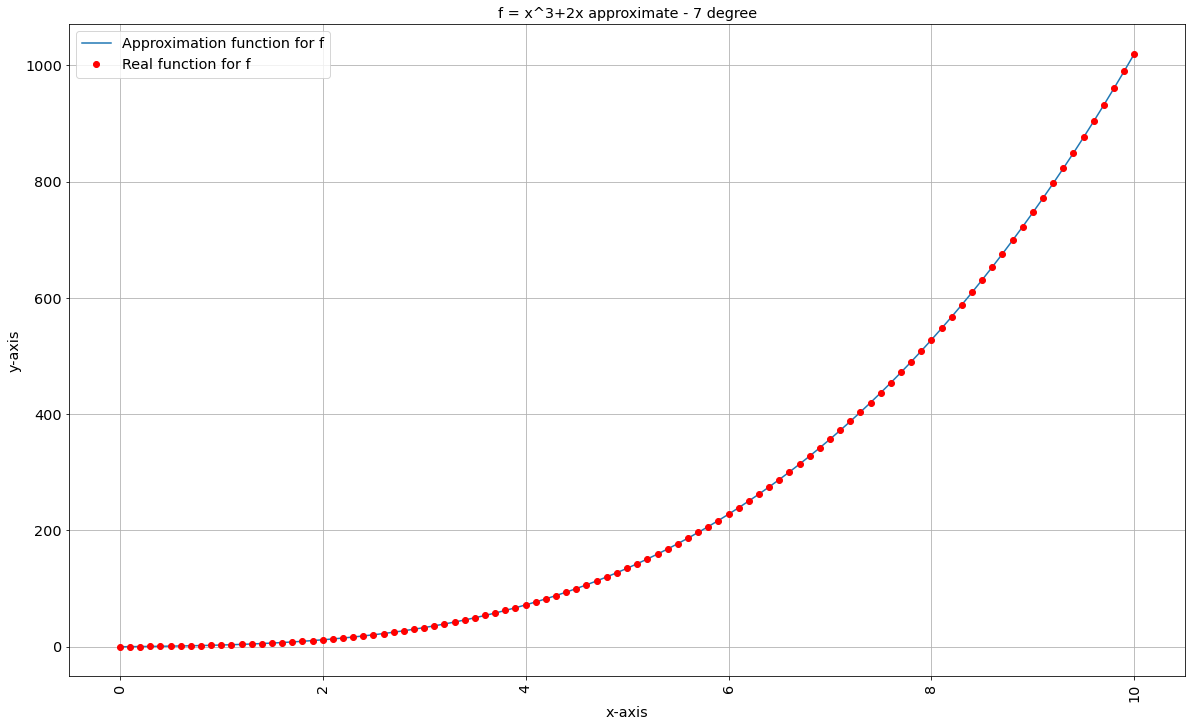

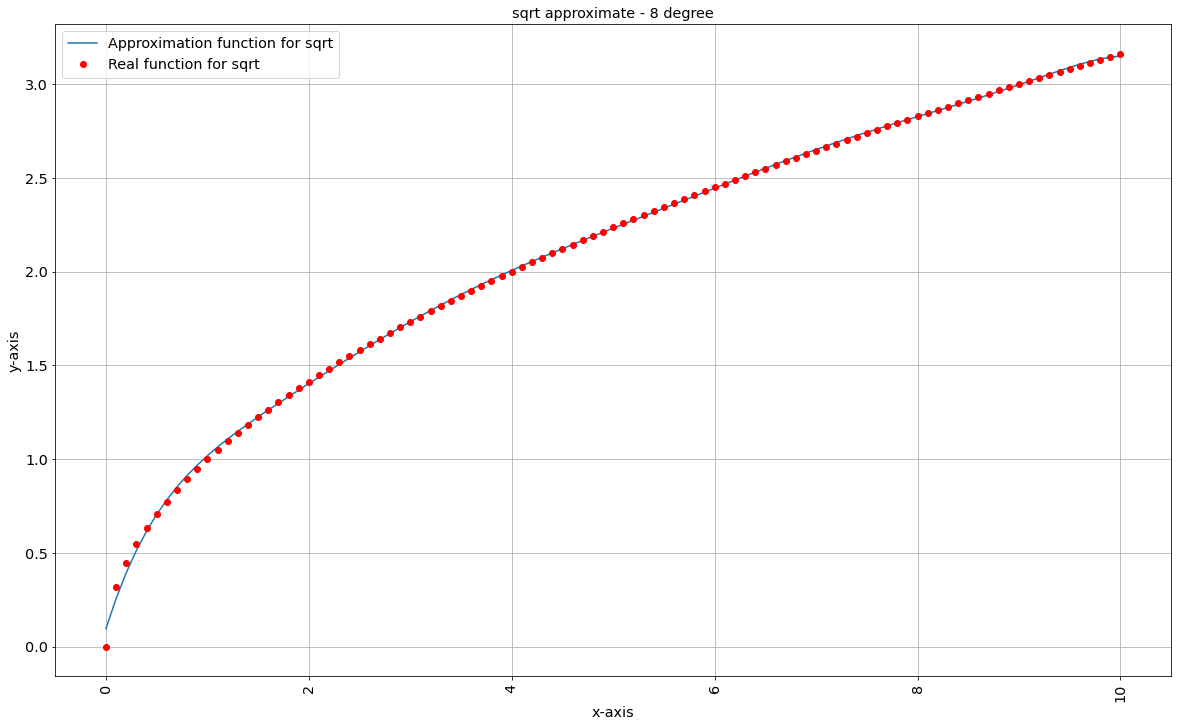

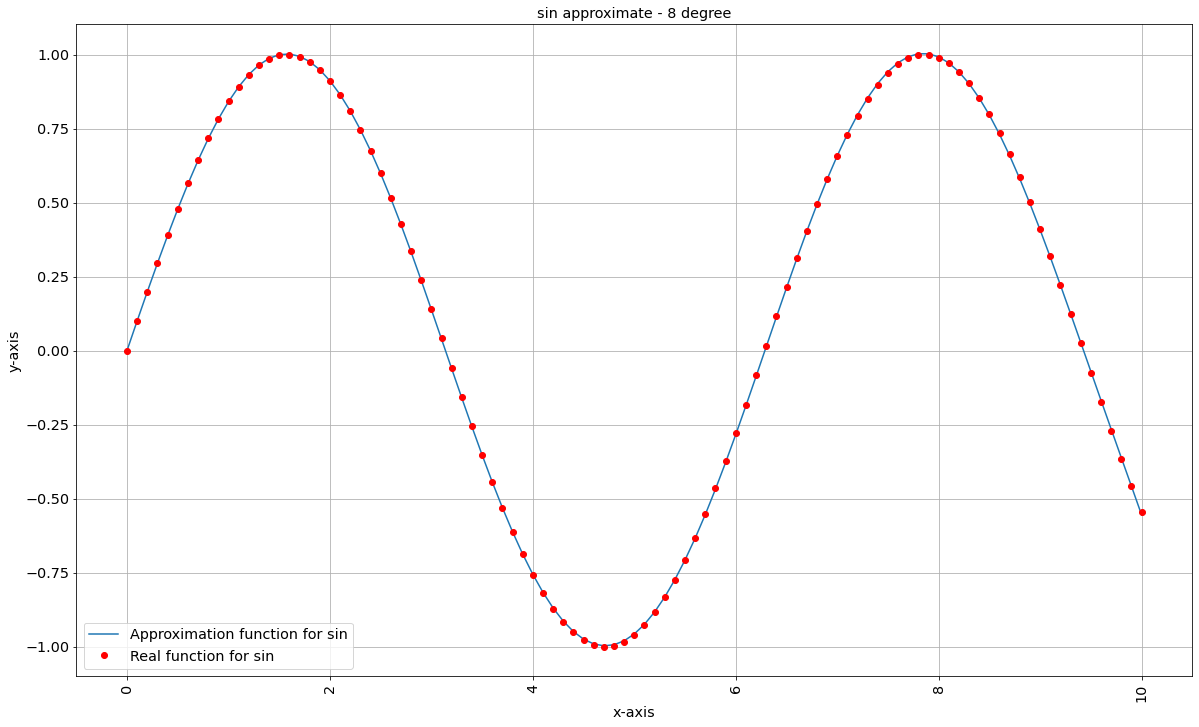

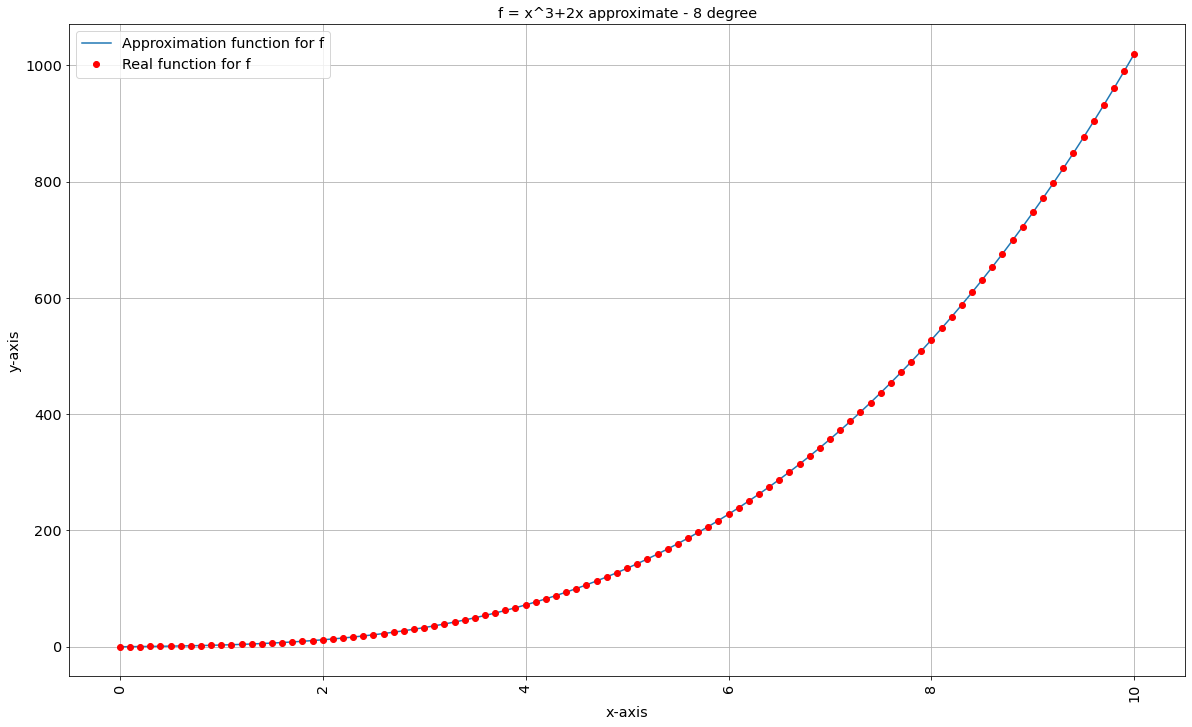

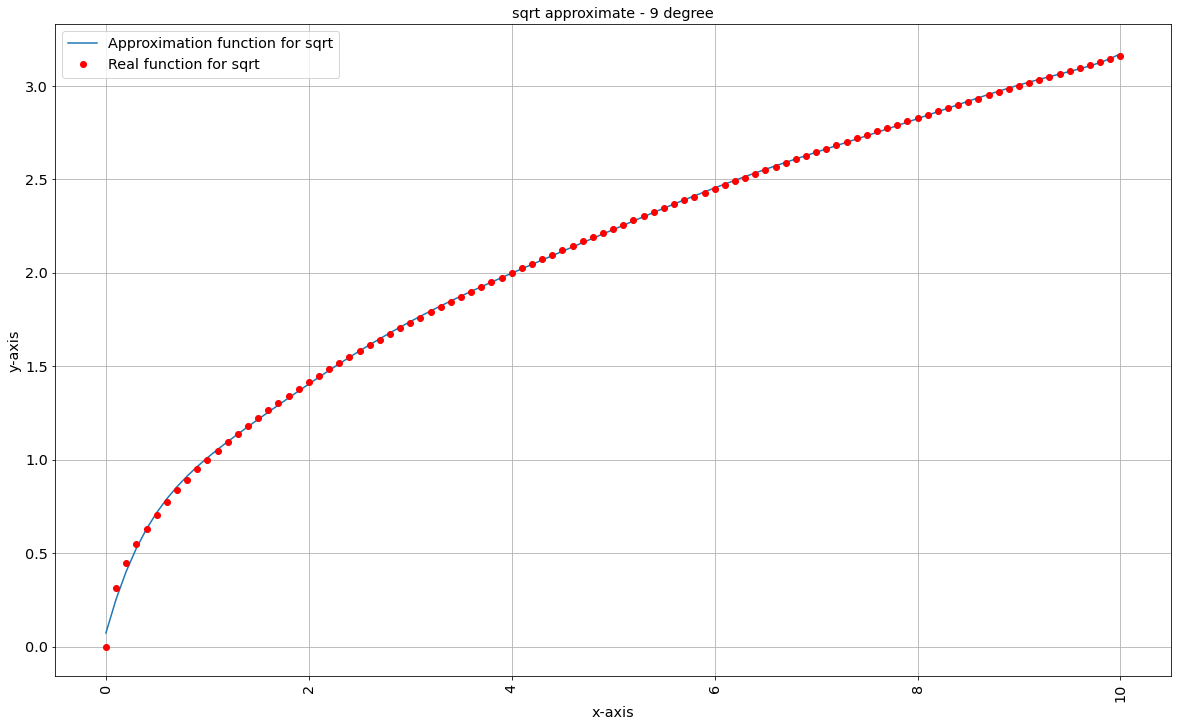

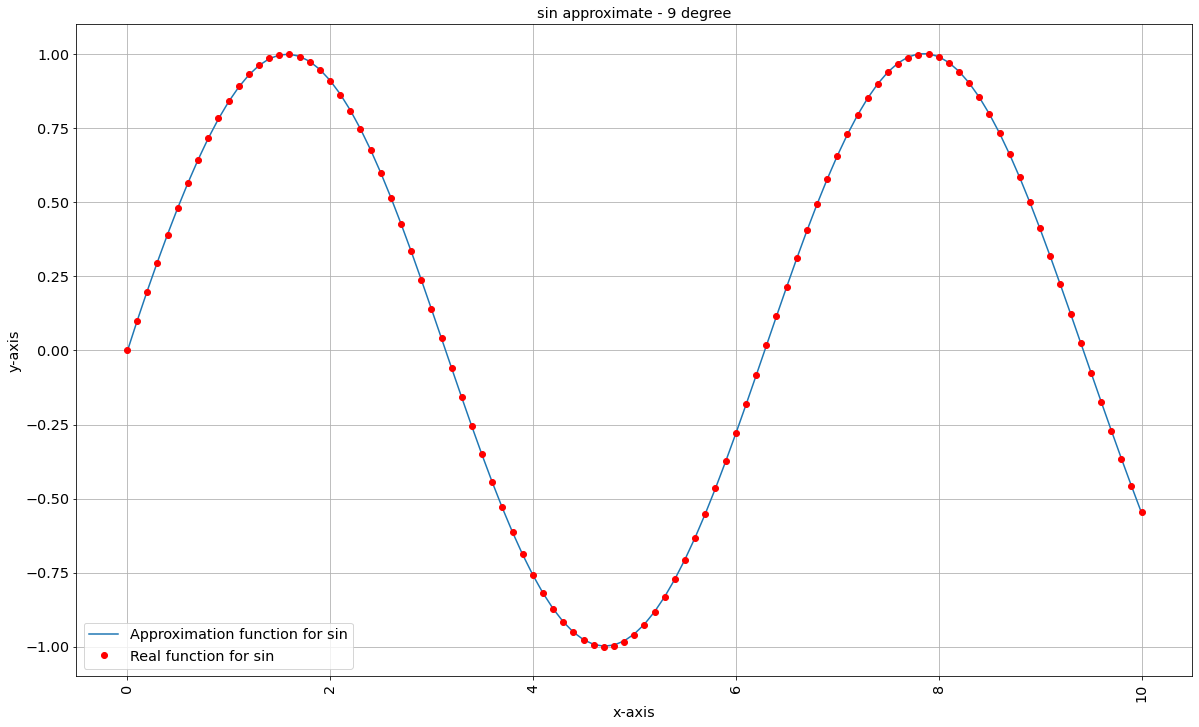

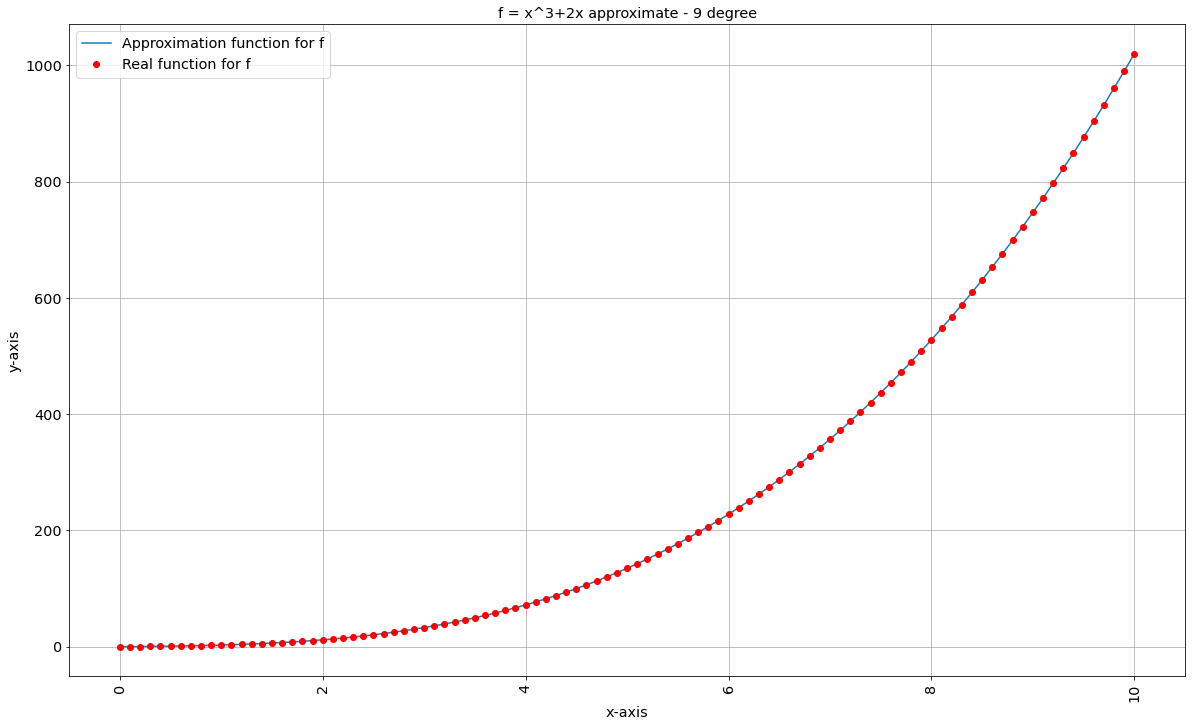

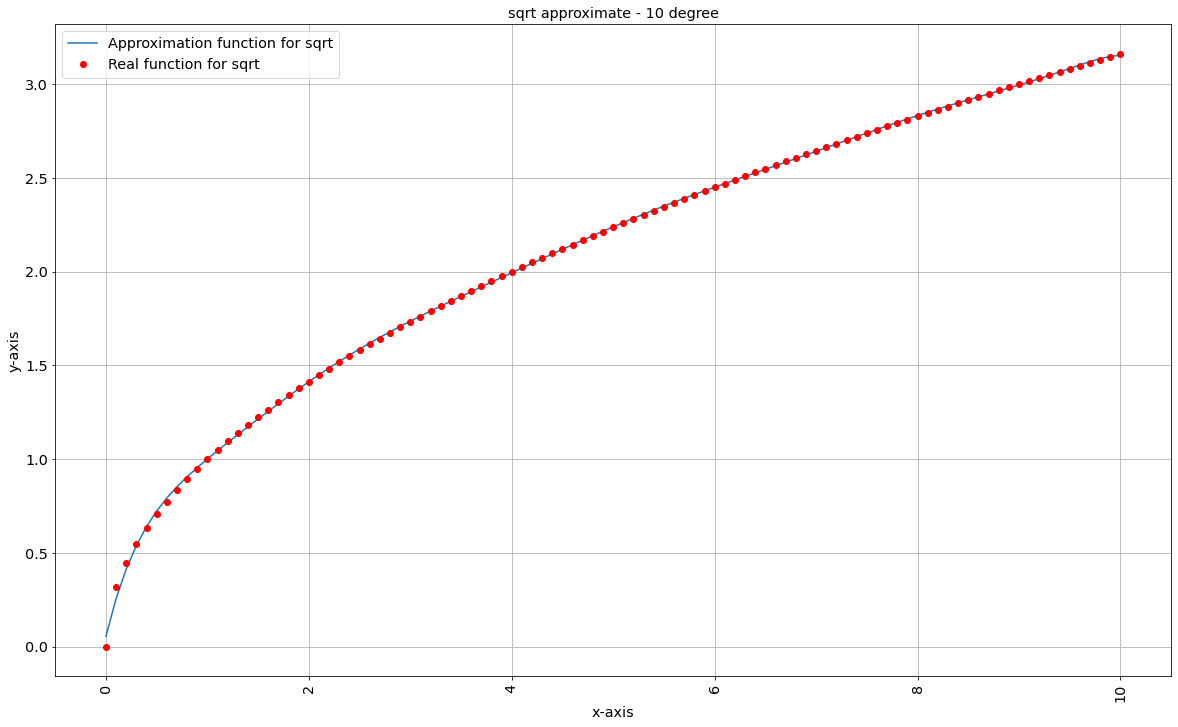

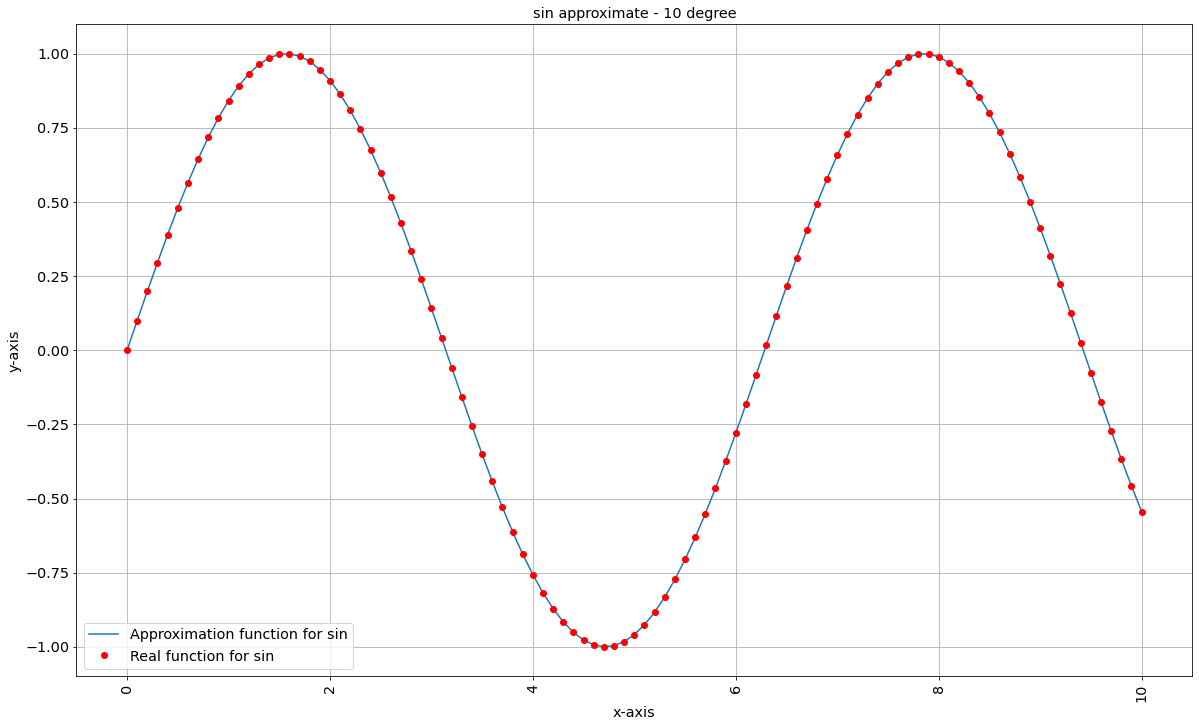

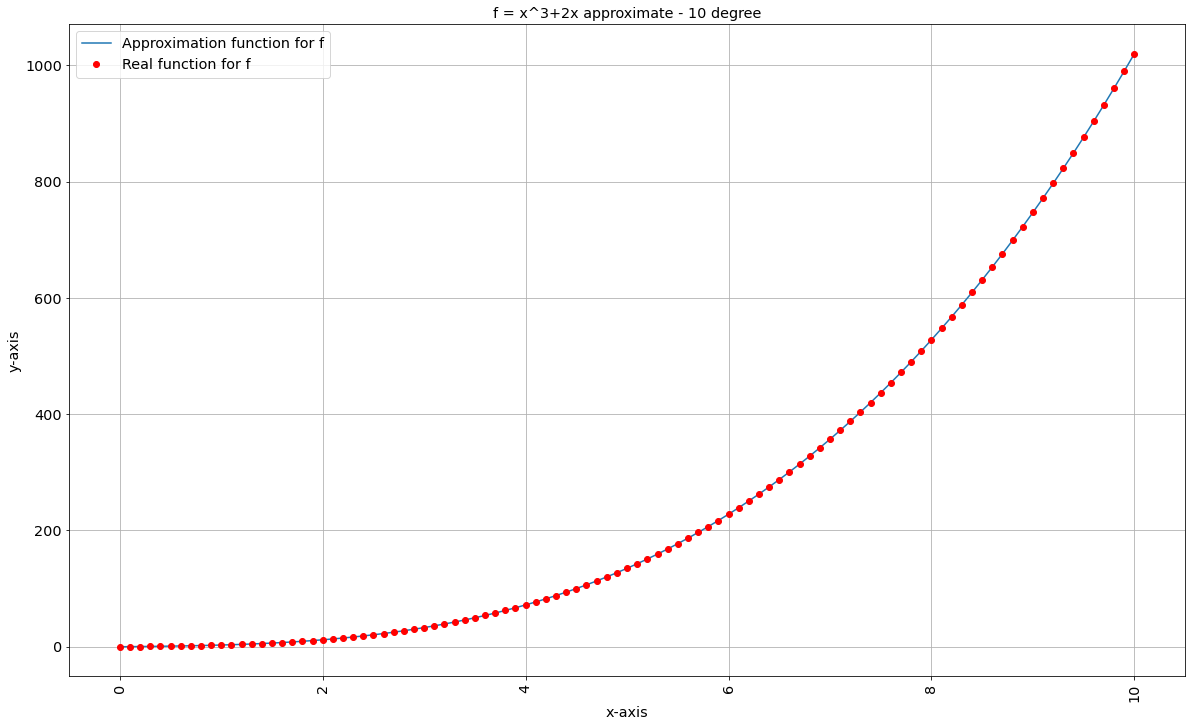

In [29]:
python_approximate(0, 10, 100, 10)

#Aproksymacja dla funkcji wzrostu zachorowań na koronawirusa za pomocą biblioteki numpy : 

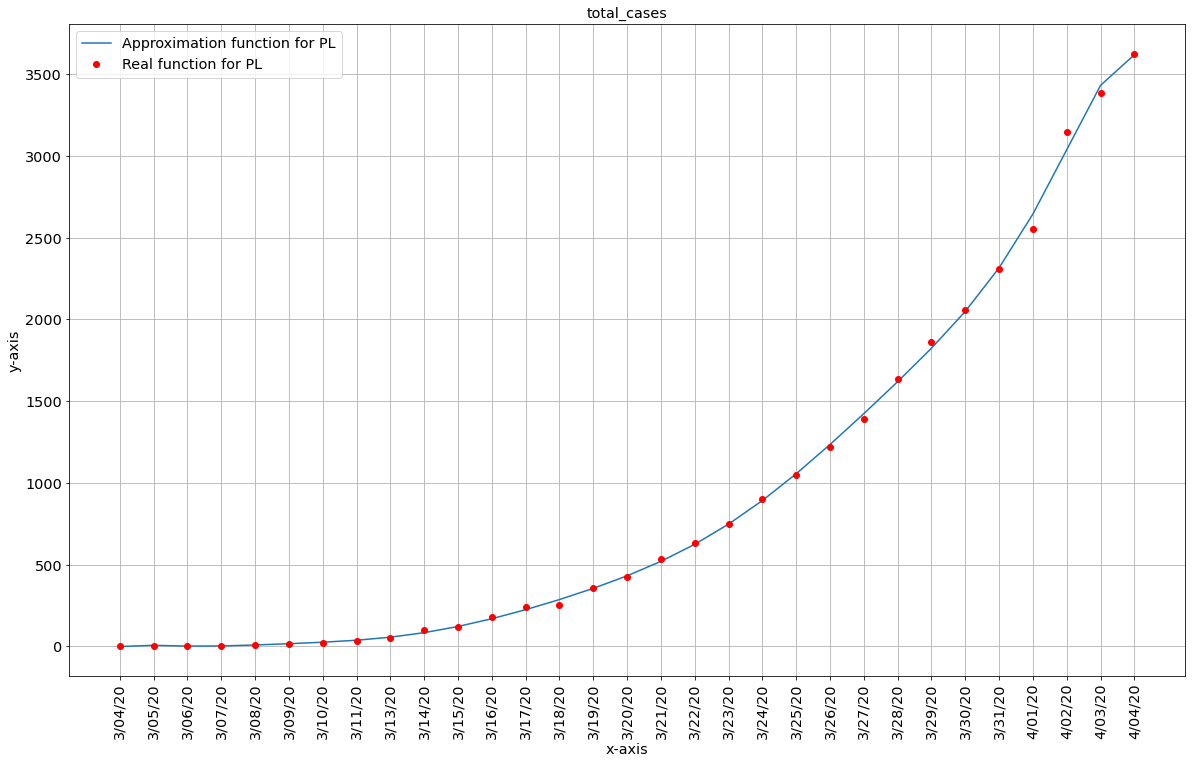

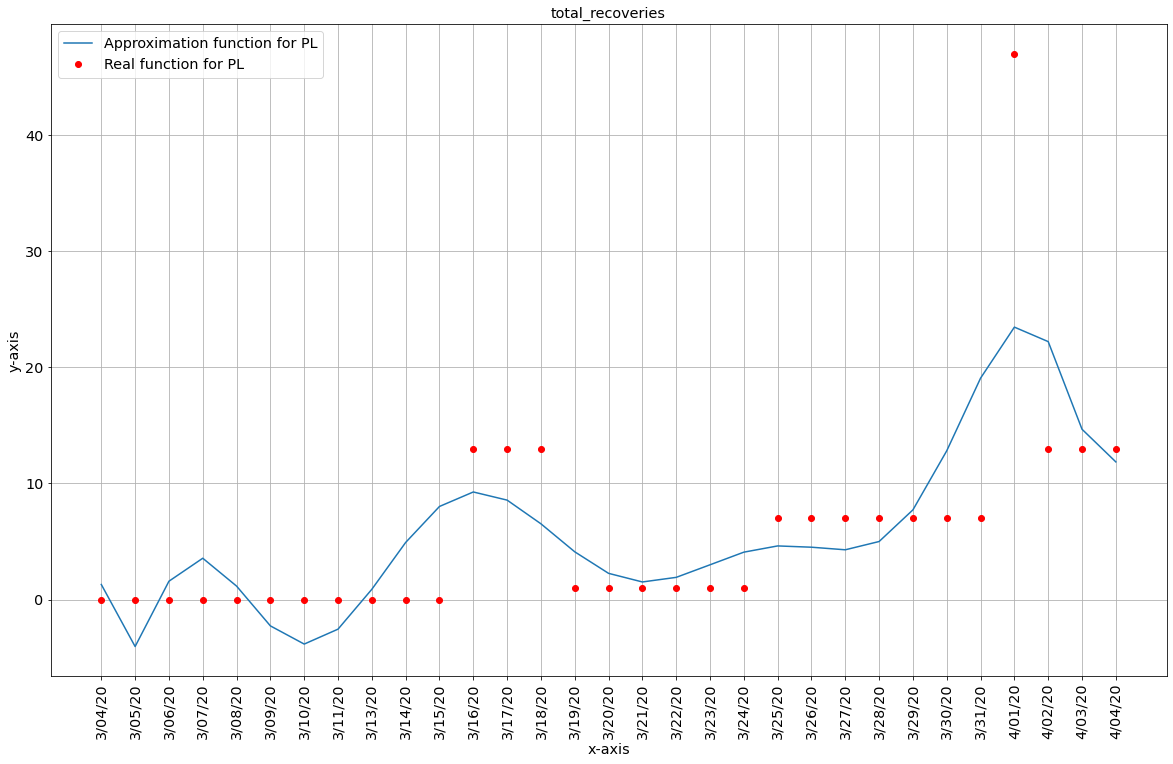

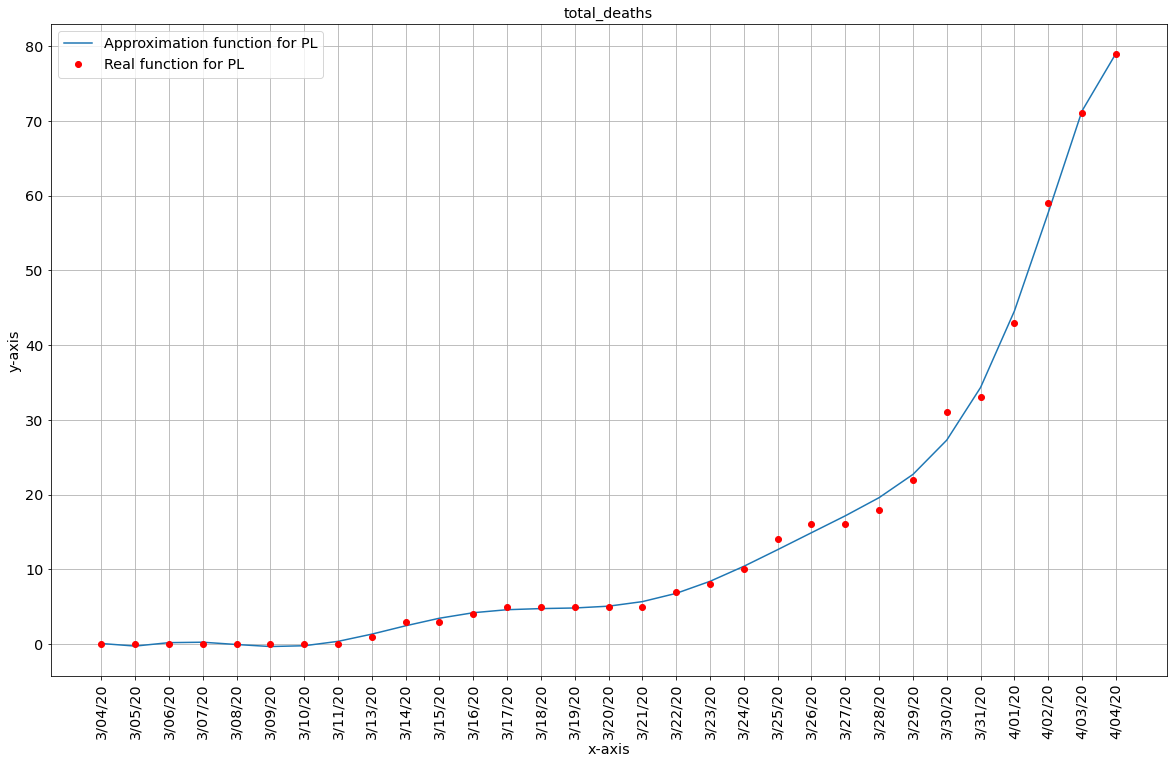

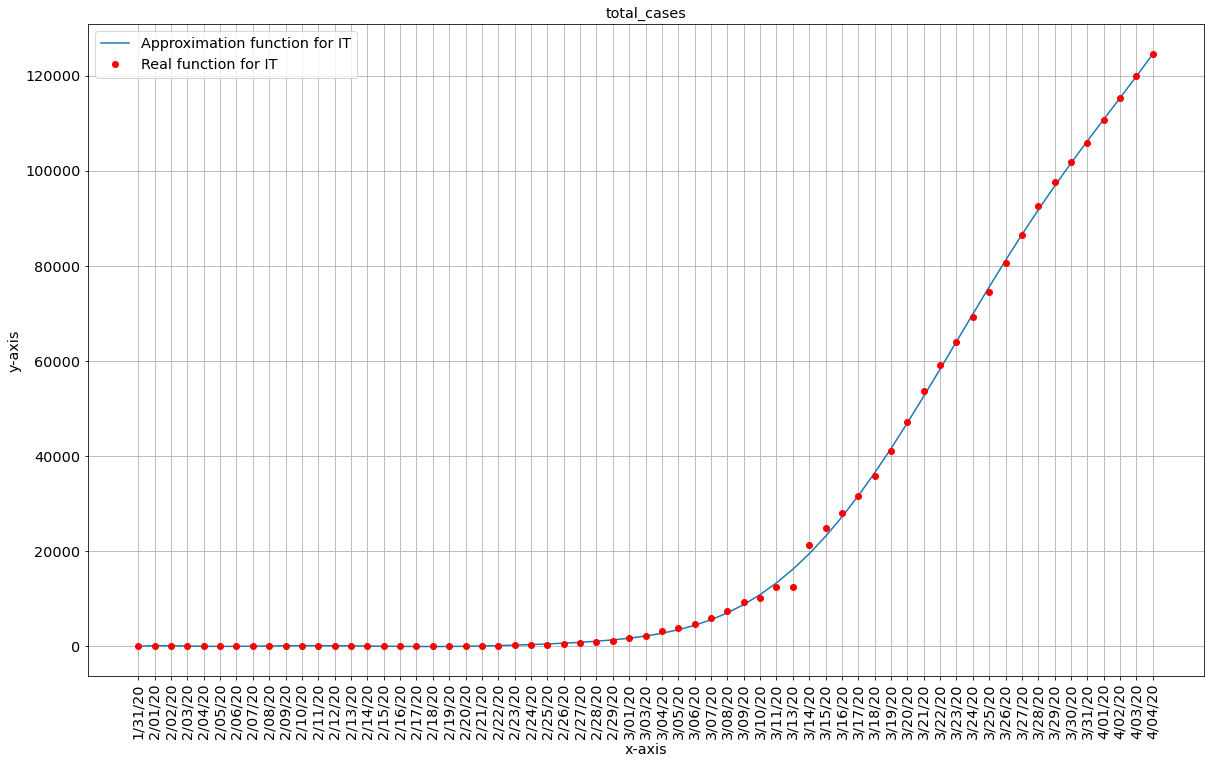

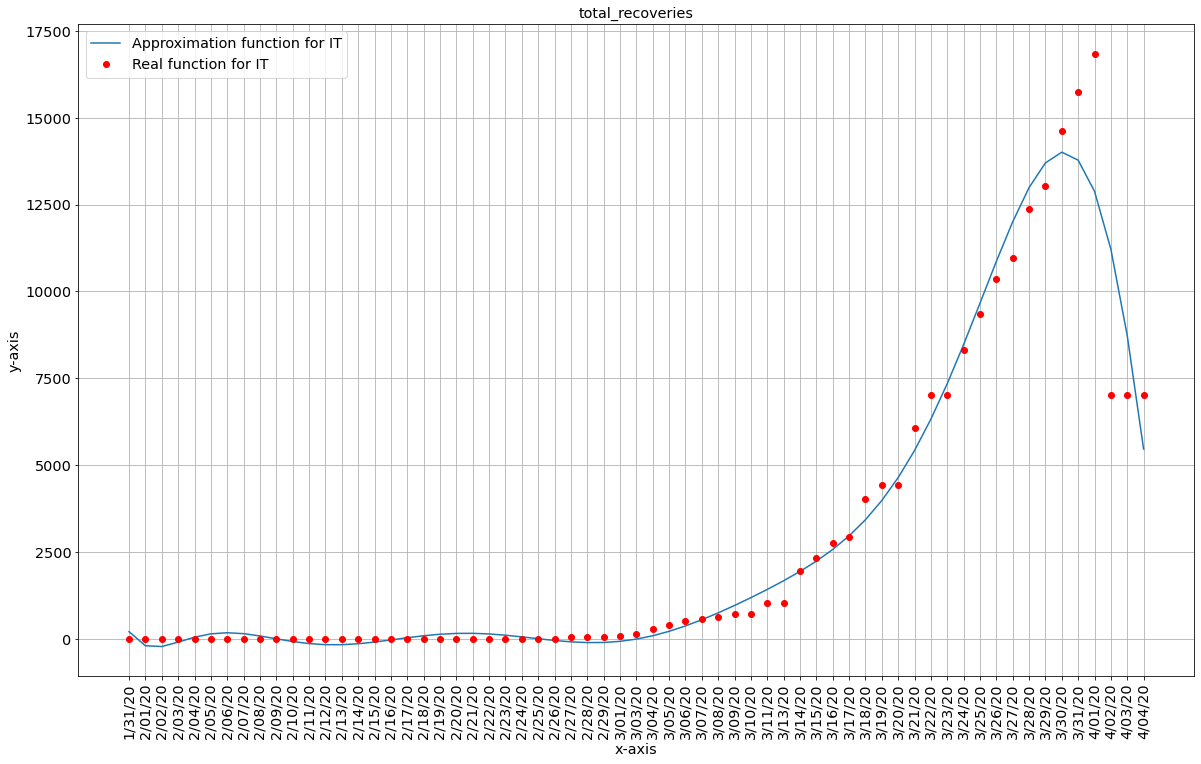

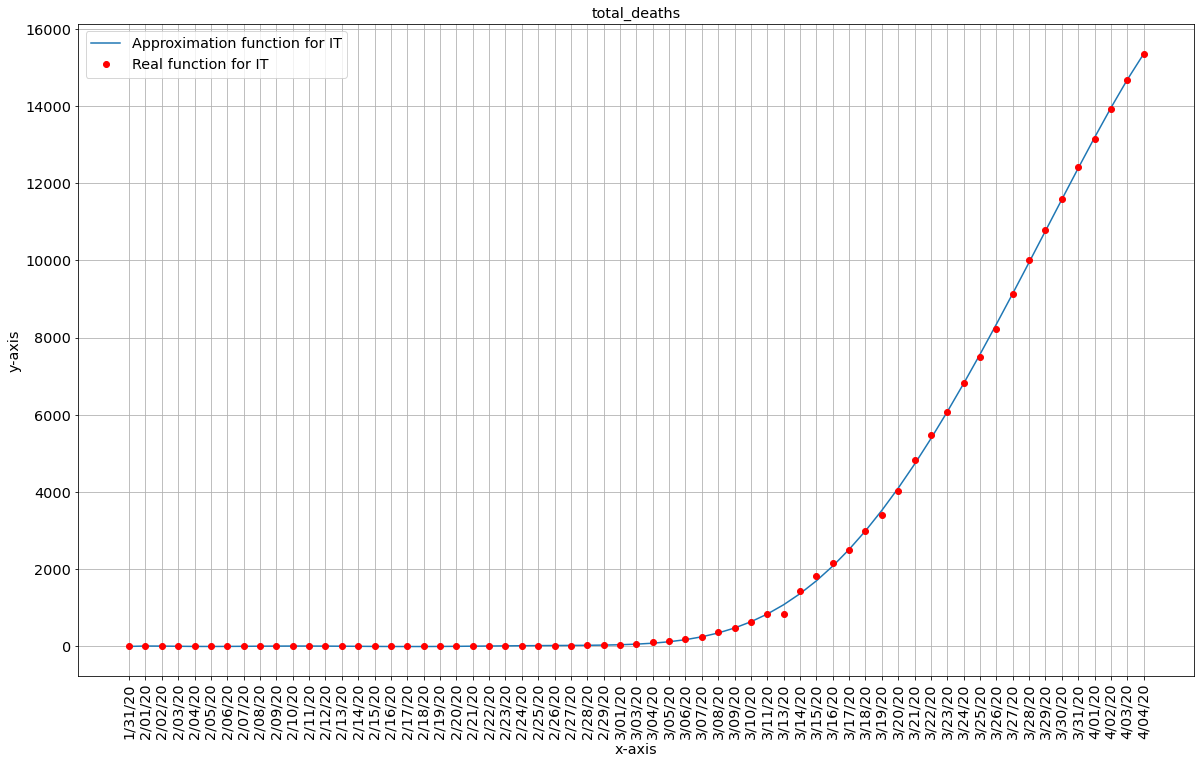

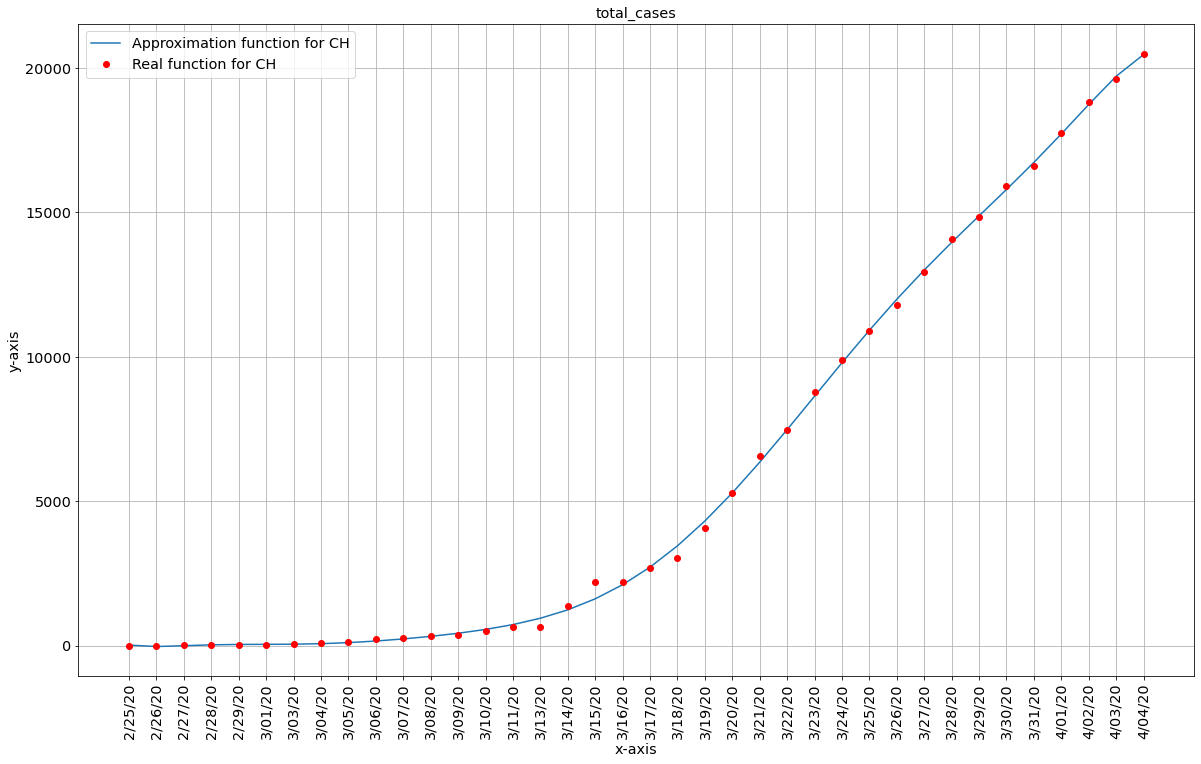

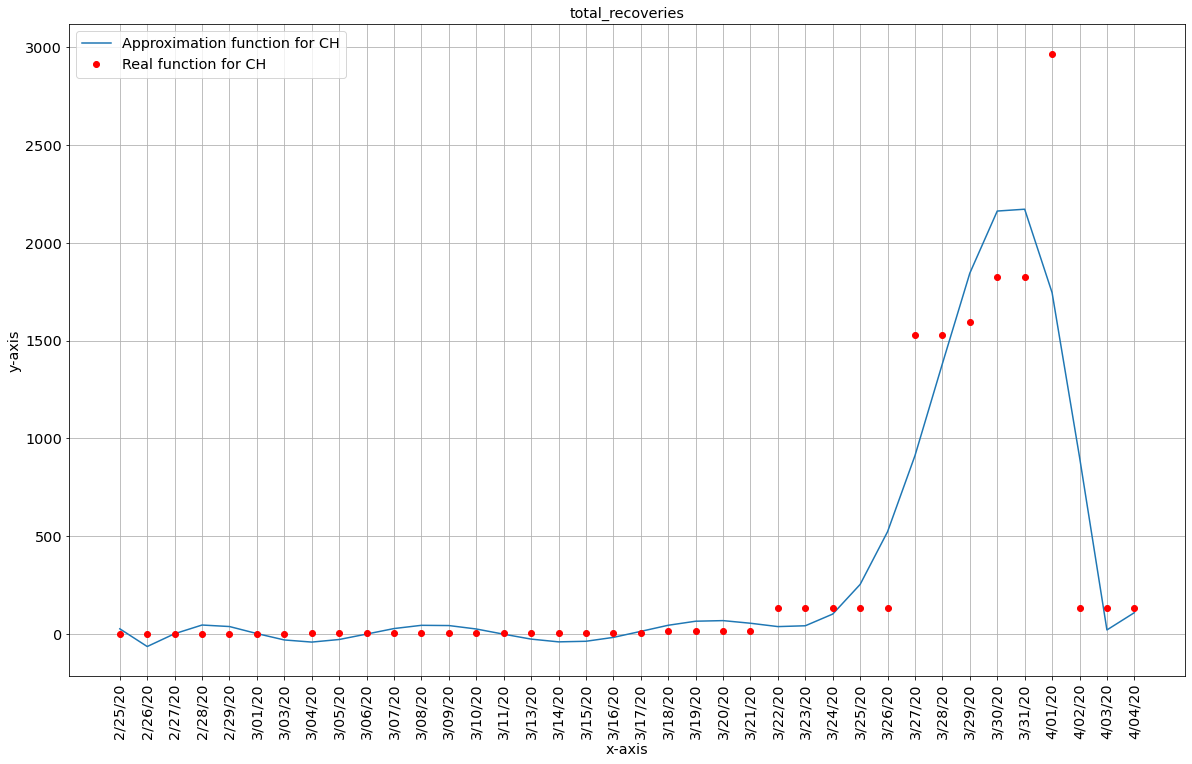

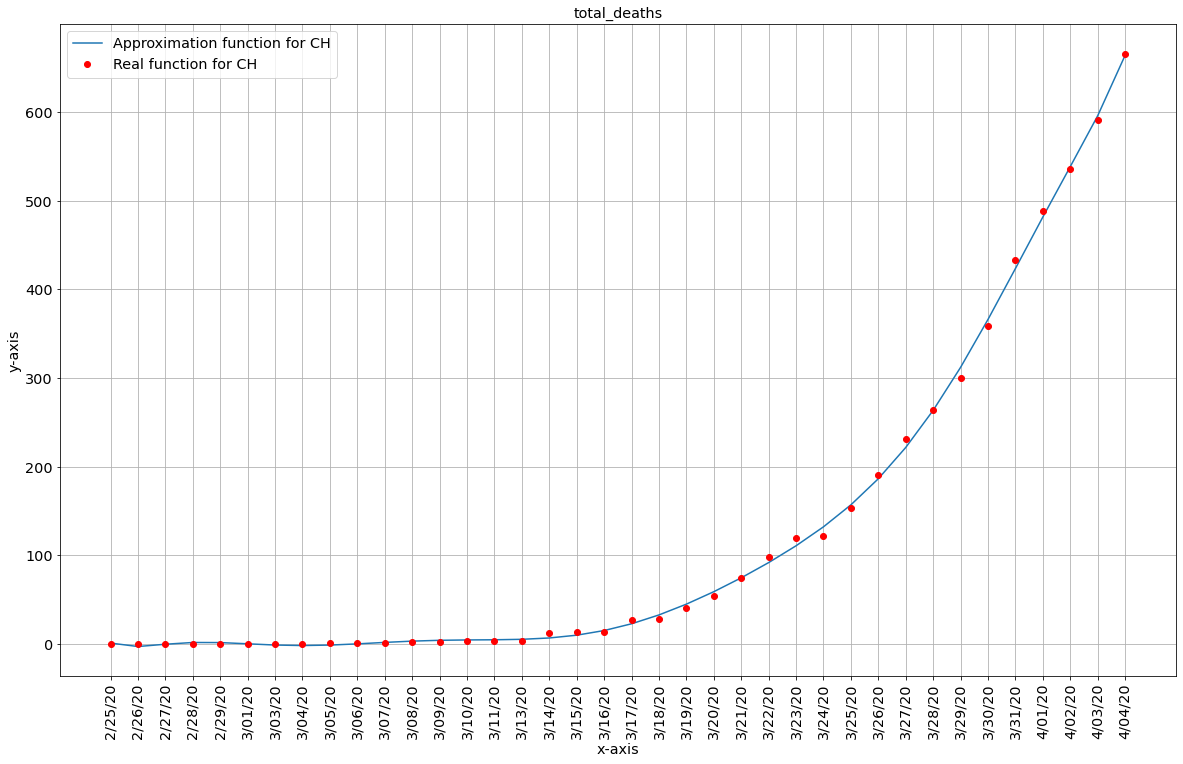

In [32]:
approximate_corona_python("PL", 10)
approximate_corona_python("IT", 10)
approximate_corona_python("CH", 10)